In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import warnings
warnings.filterwarnings('ignore')

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 14

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

mypath="./DB/"
map_path="./map/"

all_data=pd.read_csv(mypath+"/new_data/new_alldata.csv")

print(len(all_data))#1259193 without drop

#all_file_data=all_file_data.dropna()
#print('drop na',len(all_file_data))#75421 after drop

print(all_data.shape)
all_data.head(10)

print(all_data.isnull().sum())

1259193
(1259193, 6)
location            0
temperature         0
new_tsp             0
humidity       132091
light          732574
pressure       686276
dtype: int64


In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

def fillValue(df):
    locations=df["location"].unique()
    for i, each in enumerate(locations):
        loc_df=df.loc[df["location"]==each].sort_values(['new_tsp'],ascending=True)
        print("Data filling  of data on location: ", each,len(loc_df))
        missingValue=missing_values_table(loc_df)
        print(missingValue)
        loc_df.fillna(method='pad', inplace=True)
        loc_df.fillna(method='bfill', inplace=True)
        df.loc[df["location"]==each]=loc_df

In [5]:
missingValue=missing_values_table(all_data)
print(missingValue)
fillValue(all_data)

Your selected dataframe has 6 columns.
There are 3 columns that have missing values.
          Missing Values  % of Total Values
light             732574               58.2
pressure          686276               54.5
humidity          132091               10.5
Data filling  of data on location:  ElevatorHall1F 155448
Your selected dataframe has 6 columns.
There are 3 columns that have missing values.
          Missing Values  % of Total Values
light             150828               97.0
pressure           46645               30.0
humidity           26784               17.2
Data filling  of data on location:  ElevatorHallB2F 193975
Your selected dataframe has 6 columns.
There are 3 columns that have missing values.
          Missing Values  % of Total Values
light             189426               97.7
pressure           47130               24.3
humidity           27594               14.2
Data filling  of data on location:  ElevatorHall3F 194495
Your selected dataframe has 6 columns.
The

In [6]:
missing_values_table(all_data)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [7]:
all_file_data=all_data.copy()
#all_file_data.info()
#all_file_data.describe()

In [8]:
all_file_data["weekday"] = pd.to_datetime(all_file_data["new_tsp"]).dt.dayofweek+1
all_file_data["quarter"] = pd.to_datetime(all_file_data["new_tsp"]).dt.quarter
all_file_data["month"] = pd.to_datetime(all_file_data["new_tsp"]).dt.month
all_file_data["hour"] = pd.to_datetime(all_file_data["new_tsp"]).dt.hour
all_file_data["day"] = pd.to_datetime(all_file_data["new_tsp"]).dt.day

location_map = {'ElevatorHall1F': 5, 'ElevatorHallB2F':1, 'ElevatorHall3F':9, 'CorridorB1F':4,
 'Corridor1F':6, 'Corridor3F':10,'Corridor2F':8, 'ElevatorHall2F':7, 'CorridorB2F':2,
 'ElevatorHallB1F':3}
location_floor_map = {'ElevatorHall1F': 2, 'ElevatorHallB2F':0, 'ElevatorHall3F':4, 'CorridorB1F':1,
 'Corridor1F':2, 'Corridor3F':4,'Corridor2F':3, 'ElevatorHall2F':3, 'CorridorB2F':0,
 'ElevatorHallB1F':1}
all_file_data['location_no'] = all_file_data['location'].map(location_map)


all_file_data.head(10)

,location,temperature,new_tsp,humidity,light,pressure,weekday,quarter,month,hour,day,location_no
0,ElevatorHall1F,26.768128,2020-05-03 00:00:06,46.338968,363.109666,1012.104684,7,2,5,0,3,5
1,ElevatorHallB2F,24.168304,2020-05-03 00:00:18,51.785765,263.094379,1013.288941,7,2,5,0,3,1
2,ElevatorHall3F,29.677198,2020-05-03 00:00:22,32.976185,323.088156,1010.403615,7,2,5,0,3,9
3,CorridorB1F,22.000000,2020-05-03 00:00:28,57.000000,2.432000,1013.527977,7,2,5,0,3,4
4,Corridor1F,27.000000,2020-05-03 00:00:34,50.000000,218.609881,1012.513502,7,2,5,0,3,6
5,Corridor3F,30.000000,2020-05-03 00:00:49,38.000000,357.396378,1012.571346,7,2,5,0,3,10
6,ElevatorHall1F,26.789767,2020-05-03 00:01:07,46.293253,363.109666,1012.104684,7,2,5,0,3,5
7,ElevatorHallB2F,24.170546,2020-05-03 00:01:18,51.790917,263.094379,1013.275641,7,2,5,0,3,1
8,ElevatorHall3F,29.660368,2020-05-03 00:01:23,38.256116,323.088156,1010.999658,7,2,5,0,3,9
9,CorridorB1F,21.000000,2020-05-03 00:01:28,56.000000,2.432000,1013.527977,7,2,5,0,3,4


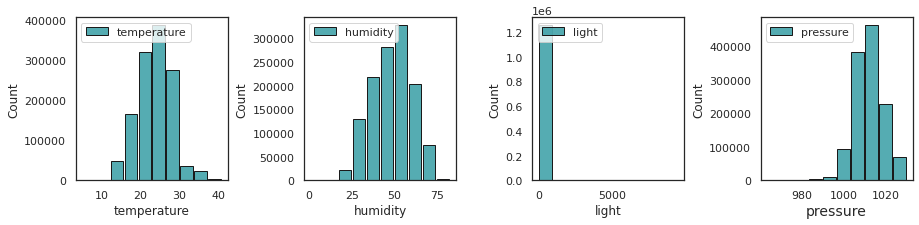

In [9]:
figsize(8, 14)
# Rename the score 
#all_file_data = all_file_data.rename(columns = {'col_a': 'col_b'})
col_name=['temperature', 'humidity','light','pressure']
fig, axs = plt.subplots(1,len(col_name),figsize=(15,3))
#print(len(col_name))

wspace = 0.5   # the amount of width reserved for blank space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.3   # the amount of height reserved for white space between subplots,
               # expressed as a fraction of the average axis height

sns.set_style(style='white')

sns.color_palette("Paired")
#sns.color_palette("Spectral")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
            wspace=wspace, hspace=hspace)
for i, each in enumerate(col_name):
    
    #print(each)
# Histogram of columns
    #plt.style.use('fivethirtyeight')
    sns.histplot(data=all_file_data[each].dropna(), bins = 10, edgecolor = 'k', ax=axs[i],label=each,shrink=.9,color="#1c9099")
    axs[i].legend(loc='upper left')
    #plt.hist(all_file_data[each].dropna(), bins = 100, edgecolor = 'k', ax=axs[i]);
    # sns.lineplot(duple_df_9["time"],duple_df_9["instance"], drawstyle='steps-mid', ax=axs[i],label=v,linewidth=1)
    plt.xlabel(each,size = 14); 
    #plt.ylabel('Values of'+each); 
    #plt.title(each);
plt.savefig('./images/stat.png',quality=100,dpi=500, bbox_inches = 'tight') 
plt.show()

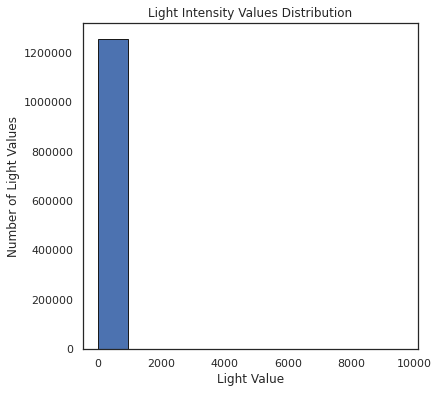

In [10]:
figsize(6, 6)
plt.ticklabel_format(style='plain')

sns.set_style(style='white')
sns.color_palette("Spectral")

#plt.style.use('fivethirtyeight')
plt.hist(all_data['light'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('Light Value'); plt.ylabel('Number of Light Values'); 
plt.title('Light Intensity Values Distribution');
plt.savefig('./images/lightraw.png',quality=100,dpi=500, bbox_inches = 'tight') 
plt.show()

In [11]:
all_file_data['light'].isnull().sum()

0

In [17]:
def find_outliers(series):
    flag=series - series.mean()> 1.96 * series.std()
    #print(flag)
    print('Size of outliers:',len(flag[flag==True]),'Size of normal data: ',len(flag[flag==False]))
    #print(series[(series - series.mean())> 1.96 * series.std()])
  
    return flag

def cap_values(series):
    data_copy=series.copy() 
    outliers = find_outliers(series)
    max_val = series[~outliers].mean()
    data_copy[outliers] = max_val
    return data_copy

columns=all_file_data.columns

print('before processing outlier; min:', np.nanmin(all_file_data['light']),'max:', np.nanmax(all_file_data['light']))

all_file_data['light'] = cap_values(all_data['light'])

#after processing outlier; min: 0.0 max: 335.543914321829
print('after processing outlier; min:', np.nanmin(all_file_data['light']),'max:', np.nanmax(all_file_data['light']))

#print(len(find_outliers[find_outliers==True]))
#for i, each in enumerate(columns):
    #if (not each=='model') and (not each=='location'):
        #print(each==True)
        #all_file_data[str(i)] = find_outliers(all_file_data[each])#all_file_data.apply(lambda g: find_outliers(g[each])).values
        #data['visitors_capped'] = stores.apply(lambda g: cap_values(g['visitors'])).values
        #data['visitors_capped_log1p'] = np.log1p(data['visitors_capped'])

before processing outlier; min: 0.0 max: 452.418289784724
Size of outliers: 97282 Size of normal data:  1161911
after processing outlier; min: 0.0 max: 452.418289784724


In [23]:
all_file_data.head(10)

,location,temperature,new_tsp,humidity,light,pressure,weekday,quarter,month,hour,day,location_no
0,ElevatorHall1F,26.768128,2020-05-03 00:00:06,46.338968,363.109666,1012.104684,7,2,5,0,3,5
1,ElevatorHallB2F,24.168304,2020-05-03 00:00:18,51.785765,263.094379,1013.288941,7,2,5,0,3,1
2,ElevatorHall3F,29.677198,2020-05-03 00:00:22,32.976185,323.088156,1010.403615,7,2,5,0,3,9
3,CorridorB1F,22.000000,2020-05-03 00:00:28,57.000000,2.432000,1013.527977,7,2,5,0,3,4
4,Corridor1F,27.000000,2020-05-03 00:00:34,50.000000,218.609881,1012.513502,7,2,5,0,3,6
5,Corridor3F,30.000000,2020-05-03 00:00:49,38.000000,357.396378,1012.571346,7,2,5,0,3,10
6,ElevatorHall1F,26.789767,2020-05-03 00:01:07,46.293253,363.109666,1012.104684,7,2,5,0,3,5
7,ElevatorHallB2F,24.170546,2020-05-03 00:01:18,51.790917,263.094379,1013.275641,7,2,5,0,3,1
8,ElevatorHall3F,29.660368,2020-05-03 00:01:23,38.256116,323.088156,1010.999658,7,2,5,0,3,9
9,CorridorB1F,21.000000,2020-05-03 00:01:28,56.000000,2.432000,1013.527977,7,2,5,0,3,4


In [ ]:
all_file_data.index = all_file_data['new_tsp']

from scipy import optimize


def calc_shifted_ewm(series, alpha, adjust=True):
    return series.shift().ewm(alpha=alpha, adjust=adjust).mean()


def find_best_signal(series, adjust=False, eps=10e-5):
    
    def f(alpha):
        shifted_ewm = calc_shifted_ewm(series=series, alpha=min(max(alpha, 0), 1), adjust=adjust)
        corr = np.mean(np.power(series - shifted_ewm, 2))
        return corr
     
    res = optimize.differential_evolution(func=f, bounds=[(0 + eps, 1 - eps)])
    
    return calc_shifted_ewm(series=series, alpha=res['x'][0], adjust=adjust)

#data.index = data['visit_date']

for para in ['light','pressure','humidity','temperature']:
    roll = all_file_data.groupby(['location', para]).apply(lambda g: find_best_signal(g[para]))
    all_file_data['ewm_'+each] = roll.sort_index(level=['location', para]).values
    
all_file_data.head(10)

In [ ]:
all_file_data.to_csv('DB/new_data/allData_ewm.csv', index = False)

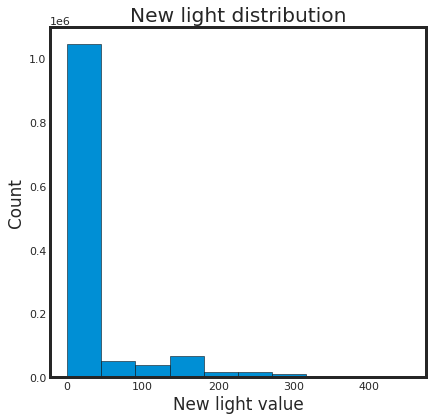

In [38]:
# Histogram Plot of new light data
figsize(6, 6)
plt.hist(all_file_data['light'].dropna(), bins = 10, edgecolor = 'black');
plt.xlabel('New light value'); 
plt.ylabel('Count'); plt.title('New light distribution');
plt.savefig('./images/lighremoveoutlier.png',quality=100,dpi=500, bbox_inches = 'tight') 
#print(len(new_light_data['light'].dropna().sort_values()),len(new_light_data.loc[new_light_data['light'] < 10, :]))

In [185]:
#the figure seems strange
#all_file_data['light'].describe()
#all_file_data['light'].dropna().sort_values().tail(1000)

#all_file_data['light'].dropna().sort_values().head(1000)

count    1.259193e+06
mean     5.261394e+01
std      1.262592e+02
min      0.000000e+00
25%      4.864000e-01
50%      2.432000e+00
75%      4.405785e+01
max      9.607500e+03
Name: light, dtype: float64

In [35]:
#print(len(all_file_data['light'].dropna().sort_values()),len(all_file_data.loc[all_file_data['light'] > 100, :]),len(all_file_data.loc[all_file_data['light'] < 100, :]))

1259193 204676 1054495


reference [离群点](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)

### 剔除离群点

离群点的选择可能需要再斟酌一些，这里选择的方法是extreme outlier。

*   $\text{First Quartile} -3 * \text{Interquartile Range}$
*   $\text{Third Quartile} + 3 * \text{Interquartile Range}$

In [46]:
# # Calculate first and third quartile
# first_quartile =all_file_data['light'].describe()['25%']
# third_quartile =all_file_data['light'].describe()['75%']

# # Interquartile range
# iqr = third_quartile - first_quartile

# # Remove outliers
# all_file_data = all_file_data[(all_file_data['light']> (first_quartile - 3 * iqr)) &
#             (all_file_data['light'] < (third_quartile + 3 * iqr))]

### 观察哪些变量会对结果产生影响

kdeplot这个最实用啦 [density plot](https://datavizcatalogue.com/methods/density_plot.html) 

选择大于100条数据的

In [197]:
# Create a list of  locations with more than 100 measurements
types = all_file_data.dropna(subset=['location'])
types = types['location'].value_counts()
#types = list(types[types.values > 100].index)
print(types)

ElevatorHall3F     194495
ElevatorHallB2F    193975
ElevatorHall1F     155448
Corridor3F         154291
CorridorB1F        125445
Corridor2F         115383
ElevatorHall2F     113407
Corridor1F         107702
CorridorB2F         73786
ElevatorHallB1F     25261
Name: location, dtype: int64


In [12]:
from datetime import datetime

features = all_file_data.copy()

features["new_tsp"] = pd.to_datetime(features["new_tsp"], format="%Y-%m-%d %H:%M:%S")

start='2019-10-05 00:00:00'
start= datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
end='2019-10-20 00:00:00'
end= datetime.strptime(end, '%Y-%m-%d %H:%M:%S')

spec_date_pd=features.loc[(features['new_tsp'] >= start) & (features['new_tsp'] < end)] 

print(pd.value_counts(spec_date_pd['location'].values))
spec_date_pd.head(10)

ElevatorHall1F     9293
Corridor3F         9240
CorridorB1F        9239
ElevatorHall3F     9231
ElevatorHall2F     9226
CorridorB2F        9215
ElevatorHallB2F    9190
Corridor2F         9163
Corridor1F         9132
ElevatorHallB1F    6131
dtype: int64


,location,temperature,new_tsp,humidity,light,pressure,weekday,quarter,month,hour,day,location_no
668284,ElevatorHall3F,28.493826,2019-10-06 00:00:04,47.613316,0.486400,1013.912623,7,4,10,0,6,9
668285,Corridor2F,29.000000,2019-10-06 00:00:10,51.000000,14.257830,1016.142663,7,4,10,0,6,8
668286,Corridor1F,28.000000,2019-10-06 00:00:20,57.000000,23.783642,1014.129187,7,4,10,0,6,6
668287,CorridorB1F,26.000000,2019-10-06 00:00:26,55.000000,2.432000,1015.240238,7,4,10,0,6,4
668288,CorridorB2F,28.000000,2019-10-06 00:00:30,58.000000,2.433948,1013.847588,7,4,10,0,6,2
668289,ElevatorHallB2F,27.138957,2019-10-06 00:00:39,56.201993,2.432000,1016.282998,7,4,10,0,6,1
668290,ElevatorHall2F,27.624495,2019-10-06 00:00:42,50.775129,6.608317,1014.593576,7,4,10,0,6,7
668291,ElevatorHall1F,27.167050,2019-10-06 00:00:49,54.178638,2.432000,1015.166548,7,4,10,0,6,5
668292,Corridor3F,29.000000,2019-10-06 00:00:50,45.000000,35.569896,1015.258437,7,4,10,0,6,10
668293,ElevatorHallB1F,27.248313,2019-10-06 00:00:58,56.489464,14.002982,1015.747599,7,4,10,0,6,3


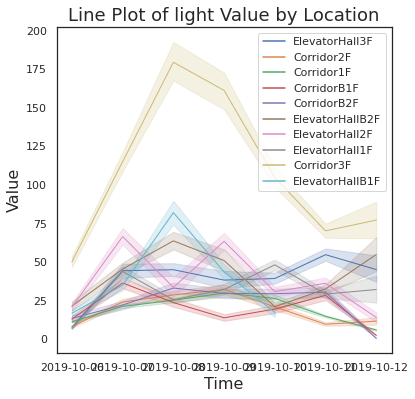

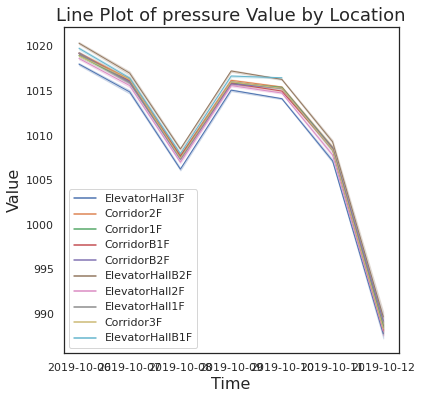

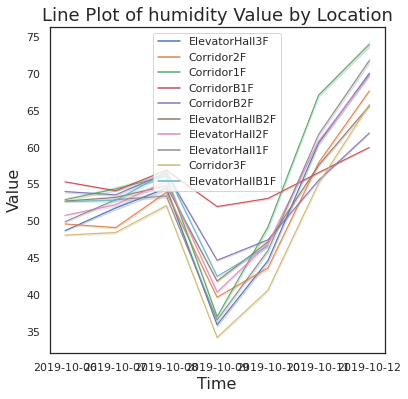

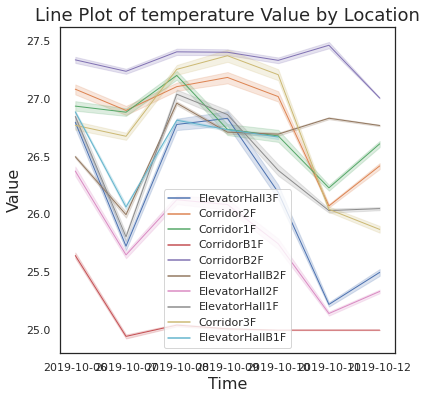

In [13]:
sns.set_style(style='white')
#sns.set_theme()
#sns.husl_palette(len(types))
sns.color_palette("Spectral")

spec_date_pd["date"] =  pd.to_datetime(spec_date_pd["new_tsp"]).dt.date


for each in ['light','pressure','humidity','temperature']:
    sns.lineplot(data=spec_date_pd,x="date", linewidth=1, y=each,hue="location")
    # label the plot
    plt.legend()
    plt.xlabel('Time', size = 16); plt.ylabel('Value', size = 16); 
    plt.title('Line Plot of '+each+' Value by Location', size = 18);
    plt.show()
    #diiferent Value density in locations

ElevatorHall1F
ElevatorHallB2F
ElevatorHall3F
CorridorB1F
Corridor1F
Corridor3F
Corridor2F
ElevatorHall2F
CorridorB2F
ElevatorHallB1F


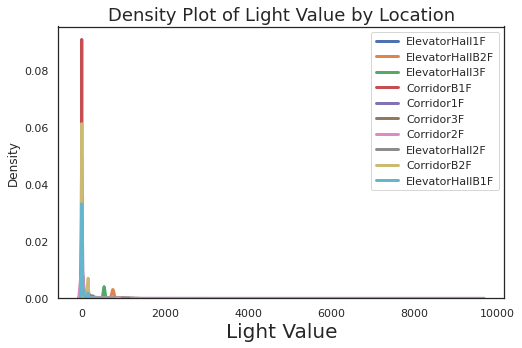

In [14]:
# Plot of distribution of scores for location categories
import seaborn as sns; sns.set_style(style='white')
#sns.set_theme()
#sns.husl_palette(len(types))
sns.color_palette("Spectral")

figsize(8, 5)
#sns.color_palette("Spectral")

types=all_file_data['location'].unique()
# Plot each location
for l_type in types:
    # Select the location type
    subset =  all_file_data[all_file_data['location'] == l_type]
    print(l_type)
    # Density plot of Energy Star scores
    sns.kdeplot(subset['light'].dropna(),label = l_type,  linewidth=3,  alpha = 0.8);#,shade = False,
    
# label the plot
plt.legend()
plt.xlabel('Light Value', size = 20); plt.ylabel('Density', size = 12); 
plt.title('Density Plot of Light Value by Location', size = 18);
#diiferent Value density in locations

plt.savefig('./images/light.png',quality=100,dpi=500, bbox_inches = 'tight') 

ElevatorHall1F
ElevatorHallB2F
ElevatorHall3F
CorridorB1F
Corridor1F
Corridor3F
Corridor2F
ElevatorHall2F
CorridorB2F
ElevatorHallB1F


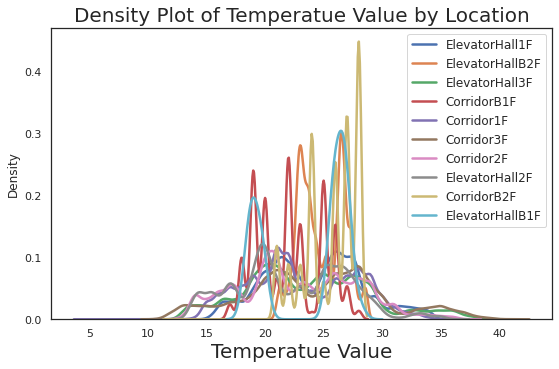

In [34]:
figsize(8, 5)

# Plot each location
for l_type in types:
    # Select the building type
    subset =  all_file_data[all_file_data['location'] == l_type]
    print(l_type)
    # Density plot of Energy Star scores
    sns.kdeplot(subset['temperature'].dropna(),
               label = l_type,  alpha = 0.8, linewidth=2.5);#,shade = False,
    
# label the plot
plt.legend(fontsize = 12)
plt.xlabel('Temperatue Value', size = 20); plt.ylabel('Density', size = 12); 
plt.title('Density Plot of Temperatue Value by Location', size = 20);
plt.savefig('./images/Temperatue.png',quality=100,dpi=500,bbox_inches = 'tight') 

ElevatorHall1F
ElevatorHallB2F
ElevatorHall3F
CorridorB1F
Corridor1F
Corridor3F
Corridor2F
ElevatorHall2F
CorridorB2F
ElevatorHallB1F


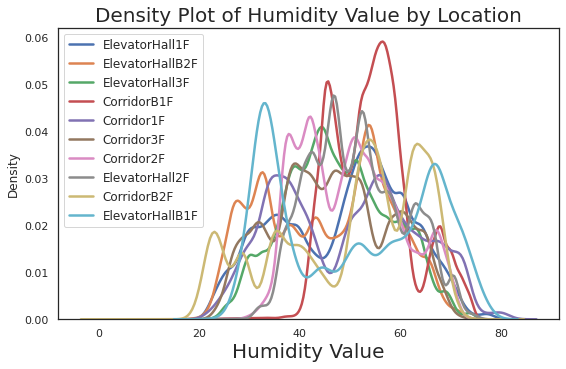

In [35]:
figsize(8, 5)

# Plot each location
for l_type in types:
    # Select the building type
    subset =  all_file_data[all_file_data['location'] == l_type]
    print(l_type)
    # Density plot of Energy Star scores
    sns.kdeplot(subset['humidity'].dropna(),
               label = l_type,  alpha = 0.8, linewidth=2.5);#,shade = False,
    
# label the plot
plt.legend(fontsize = 12)
plt.xlabel('Humidity Value', size = 20); plt.ylabel('Density', size = 12); 
plt.title('Density Plot of Humidity Value by Location', size = 20);
plt.savefig('./images/Humidity.png',quality=100,dpi=500,bbox_inches = 'tight') 


ElevatorHall1F
ElevatorHallB2F
ElevatorHall3F
CorridorB1F
Corridor1F
Corridor3F
Corridor2F
ElevatorHall2F
CorridorB2F
ElevatorHallB1F


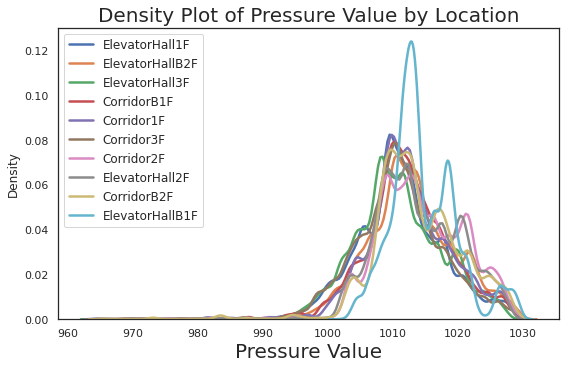

In [40]:
figsize(8, 5)


# Plot each location
for l_type in types:
    # Select the building type
    subset =  all_file_data[all_file_data['location'] == l_type]
    print(l_type)
    # Density plot of Energy Star scores
    sns.kdeplot(subset['pressure'].dropna(),
               label = l_type,  alpha = 0.8,linewidth=2.5);#,shade = False,
    
# label the plot
plt.legend(fontsize = 12)
plt.xlabel('Pressure Value', size = 20); plt.ylabel('Density', size = 12); 
plt.title('Density Plot of Pressure Value by Location', size = 20);

fig.subplots_adjust(left=0.8)

plt.savefig('./images/pressure.png',quality=100,dpi=500, bbox_inches = 'tight') 

### 特征和标签之间的相关性

Pearson相关系数，帮助我们来筛选特征

![](images/correlation_examples.png)


In [37]:
corr_df=all_file_data.corr().round(3)
# formater= lambda x:"{0:.03f}".format
# corr_df=corr_df.applymap(formater)
corr_df

,temperature,humidity,light,pressure,weekday,quarter,month,hour,day,location_no
temperature,1.000,0.418,0.063,-0.281,0.011,0.126,0.093,-0.039,-0.016,-0.086
humidity,0.418,1.000,-0.140,-0.330,-0.033,0.267,0.193,0.073,0.174,-0.001
light,0.063,-0.140,1.000,0.012,-0.043,0.040,0.056,-0.239,-0.060,0.287
pressure,-0.281,-0.330,0.012,1.000,0.072,0.232,0.265,0.041,0.113,-0.074
weekday,0.011,-0.033,-0.043,0.072,1.000,-0.041,-0.041,0.005,-0.108,0.000
quarter,0.126,0.267,0.040,0.232,-0.041,1.000,0.967,-0.008,0.187,0.011
month,0.093,0.193,0.056,0.265,-0.041,0.967,1.000,-0.007,0.247,0.016
hour,-0.039,0.073,-0.239,0.041,0.005,-0.008,-0.007,1.000,-0.007,-0.000
day,-0.016,0.174,-0.060,0.113,-0.108,0.187,0.247,-0.007,1.000,-0.009
location_no,-0.086,-0.001,0.287,-0.074,0.000,0.011,0.016,-0.000,-0.009,1.000


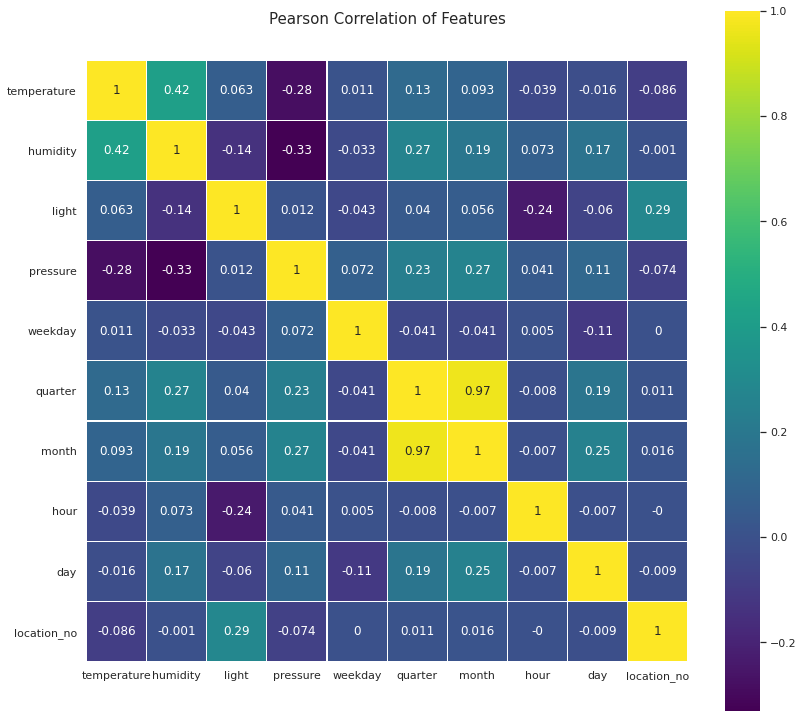

In [42]:
sns.set_style(style='white')

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_df,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('./images/corr.png',quality=100,dpi=500,bbox_inches = 'tight')

In [191]:
# Find all correlations and sort 
correlations_data = corr_df['temperature'].sort_values()
# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations print(correlations_data.tail(15))

pressure      -0.281
location_no   -0.086
hour          -0.039
day           -0.016
weekday        0.011
light          0.060
month          0.093
quarter        0.126
humidity       0.418
temperature    1.000
Name: temperature, dtype: float64 



`pressure`和  `temperature` 呈现出明显的负相关，

`humidity`和`temperature`呈现出明显的正相关，

`pressure`和 `temperature`呈现出明显的相关

还需要在考虑下非线性变换的特征，比如平方，log等等，都可以来试试，对于类别变量还可以用one-hot encode来转换下。

In [163]:
# # Select the numeric columns
# numeric_subset = all_file_data.select_dtypes('number')

# # Create columns with square root and log of numeric columns
# for col in numeric_subset.columns:
#     # Skip the Energy Star Score column
#     if col == 'temperature':
#         next
#     else:
#         numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
#         numeric_subset['log_' + col] = np.log(numeric_subset[col])

# # Select the categorical columns
# #categorical_subset = all_file_data[['location']]
# #print(categorical_subset.columns)
# # One hot encode
# #categorical_subset = pd.get_dummies(categorical_subset)
# #print(categorical_subset.columns)
# # Join the two dataframes using concat
# # Make sure to use axis = 1 to perform a column bind
# features = pd.concat([numeric_subset, all_file_data['location']], axis = 1)

# print(features.shape)
# # Drop buildings without an energy star score
# features = features.dropna(subset = ['temperature'])

# # Find correlations with the score 
# correlations = features.corr()['temperature'].dropna().sort_values()

# # Display most positive correlations看起来经过变换后的特征并没有出现一些新面孔，本来比较强的变换后依旧比较强。值得一提的是类别变量one-hot encode之后成为了正相关中最强的，虽然数值还是比较低。
# correlations.head(15)

(1259193, 29)


pressure           -0.280695
sqrt_pressure      -0.280349
log_pressure       -0.279999
log_location_no    -0.118688
sqrt_location_no   -0.103920
location_no        -0.085559
hour               -0.039288
sqrt_hour          -0.031686
log_hour           -0.028166
day                -0.015578
sqrt_day           -0.007701
log_day            -0.000473
log_weekday         0.000223
sqrt_weekday        0.005591
weekday             0.010923
Name: temperature, dtype: float64

In [82]:


#features.index = features['new_tsp']

features

,location,temperature,new_tsp,humidity,light,pressure,weekday,quarter,month,hour,day,location_no
0,ElevatorHall1F,26.768128,2020-05-03 00:00:06,46.338968,NaN,1012.104684,7,2,5,0,3,5
1,ElevatorHallB2F,24.168304,2020-05-03 00:00:18,51.785765,NaN,1013.288941,7,2,5,0,3,1
2,ElevatorHall3F,29.677198,2020-05-03 00:00:22,38.256116,NaN,1010.999658,7,2,5,0,3,9
3,CorridorB1F,22.000000,2020-05-03 00:00:28,57.000000,2.432000,1011.605575,7,2,5,0,3,4
4,Corridor1F,27.000000,2020-05-03 00:00:34,50.000000,218.609881,1012.090911,7,2,5,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1259188,ElevatorHall3F,20.194169,2019-11-16 23:59:21,38.473075,NaN,1017.371148,6,4,11,23,16,9
1259189,Corridor3F,20.000000,2019-11-16 23:59:24,39.000000,335.543914,1018.749121,6,4,11,23,16,10
1259190,CorridorB1F,21.000000,2019-11-16 23:59:35,51.000000,NaN,1017.854514,6,4,11,23,16,4
1259191,CorridorB2F,24.000000,2019-11-16 23:59:40,34.000000,0.486400,1017.641326,6,4,11,23,16,2


In [168]:
# Copy the original data
# features = all_file_data.copy()

# all_file_data.head(20)

# # Select the numeric columns
# numeric_subset = all_file_data.select_dtypes('number')

# # Create columns with log of numeric columns
# for col in numeric_subset.columns:
#     # Skip the Energy Star Score column
#     if col == 'score':
#         next
#     else:
#         numeric_subset['log_' + col] = np.log(numeric_subset[col])
#         numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
# # Select the categorical columns
# #categorical_subset = all_file_data[[]]

# # One hot encode
# categorical_subset = pd.get_dummies(numeric_subset)

# # Join the two dataframes using concat
# # Make sure to use axis = 1 to perform a column bind
# features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# print(features.shape)
# features.head(10)

(1259193, 60)


,temperature,humidity,light,pressure,weekday,quarter,month,hour,day,location_no,log_temperature,sqrt_temperature,log_humidity,sqrt_humidity,log_light,sqrt_light,log_pressure,sqrt_pressure,log_weekday,sqrt_weekday,log_quarter,sqrt_quarter,log_month,sqrt_month,log_hour,sqrt_hour,log_day,sqrt_day,log_location_no,sqrt_location_no,temperature,humidity,light,pressure,weekday,quarter,month,hour,day,location_no,log_temperature,sqrt_temperature,log_humidity,sqrt_humidity,log_light,sqrt_light,log_pressure,sqrt_pressure,log_weekday,sqrt_weekday,log_quarter,sqrt_quarter,log_month,sqrt_month,log_hour,sqrt_hour,log_day,sqrt_day,log_location_no,sqrt_location_no
0,26.768128,46.338968,NaN,1012.104684,7,2,5,0,3,5,3.287212,5.173792,3.835983,6.807273,NaN,NaN,6.919787,31.813593,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,1.609438,2.236068,26.768128,46.338968,NaN,1012.104684,7,2,5,0,3,5,3.287212,5.173792,3.835983,6.807273,NaN,NaN,6.919787,31.813593,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,1.609438,2.236068
1,24.168304,51.785765,NaN,1013.288941,7,2,5,0,3,1,3.185042,4.916127,3.947115,7.196233,NaN,NaN,6.920957,31.832200,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,0.000000,1.000000,24.168304,51.785765,NaN,1013.288941,7,2,5,0,3,1,3.185042,4.916127,3.947115,7.196233,NaN,NaN,6.920957,31.832200,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,0.000000,1.000000
2,29.677198,38.256116,NaN,1010.999658,7,2,5,0,3,9,3.390379,5.447678,3.644303,6.185153,NaN,NaN,6.918695,31.796221,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,2.197225,3.000000,29.677198,38.256116,NaN,1010.999658,7,2,5,0,3,9,3.390379,5.447678,3.644303,6.185153,NaN,NaN,6.918695,31.796221,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,2.197225,3.000000
3,22.000000,57.000000,2.432000,1011.605575,7,2,5,0,3,4,3.091042,4.690416,4.043051,7.549834,0.888714,1.559487,6.919294,31.805748,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,1.386294,2.000000,22.000000,57.000000,2.432000,1011.605575,7,2,5,0,3,4,3.091042,4.690416,4.043051,7.549834,0.888714,1.559487,6.919294,31.805748,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,1.386294,2.000000
4,27.000000,50.000000,218.609881,1012.090911,7,2,5,0,3,6,3.295837,5.196152,3.912023,7.071068,5.387289,14.785462,6.919774,31.813376,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,1.791759,2.449490,27.000000,50.000000,218.609881,1012.090911,7,2,5,0,3,6,3.295837,5.196152,3.912023,7.071068,5.387289,14.785462,6.919774,31.813376,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,1.791759,2.449490
5,30.000000,38.000000,335.543914,1010.891355,7,2,5,0,3,10,3.401197,5.477226,3.637586,6.164414,5.815753,18.317858,6.918588,31.794518,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,2.302585,3.162278,30.000000,38.000000,335.543914,1010.891355,7,2,5,0,3,10,3.401197,5.477226,3.637586,6.164414,5.815753,18.317858,6.918588,31.794518,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,2.302585,3.162278
6,26.789767,46.293253,NaN,1012.104684,7,2,5,0,3,5,3.288020,5.175883,3.834996,6.803915,NaN,NaN,6.919787,31.813593,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,1.609438,2.236068,26.789767,46.293253,NaN,1012.104684,7,2,5,0,3,5,3.288020,5.175883,3.834996,6.803915,NaN,NaN,6.919787,31.813593,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,1.609438,2.236068
7,24.170546,51.790917,NaN,1013.275641,7,2,5,0,3,1,3.185135,4.916355,3.947215,7.196591,NaN,NaN,6.920944,31.831991,1.94591,2.645751,0.693147,1.414214,1.609438,2.236068,-inf,0.0,1.098612,1.732051,0.000000,1.000000,24.170546,51.790917,NaN,1013.275641,7,2,5,0,3,1,3.185135,4.916355,3.947215,7.196591,NaN,Na

### 双变量绘图

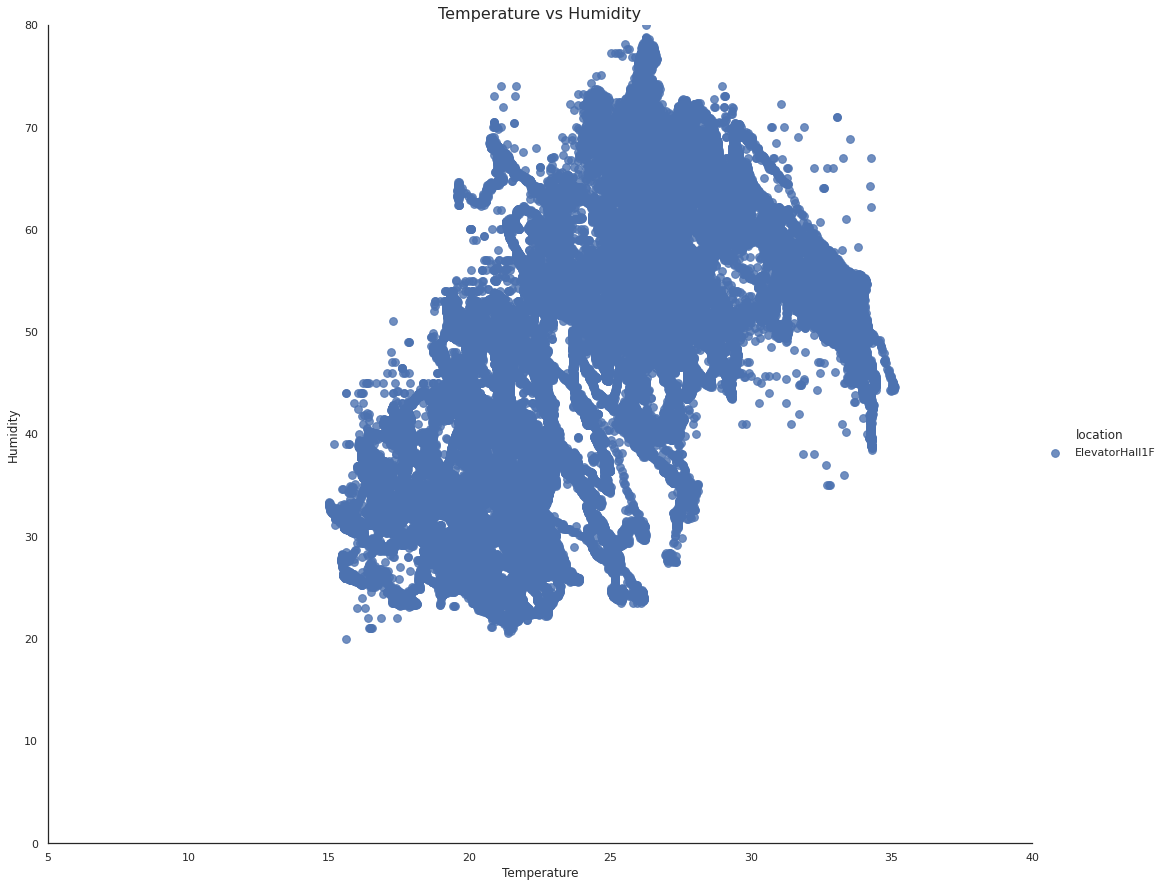

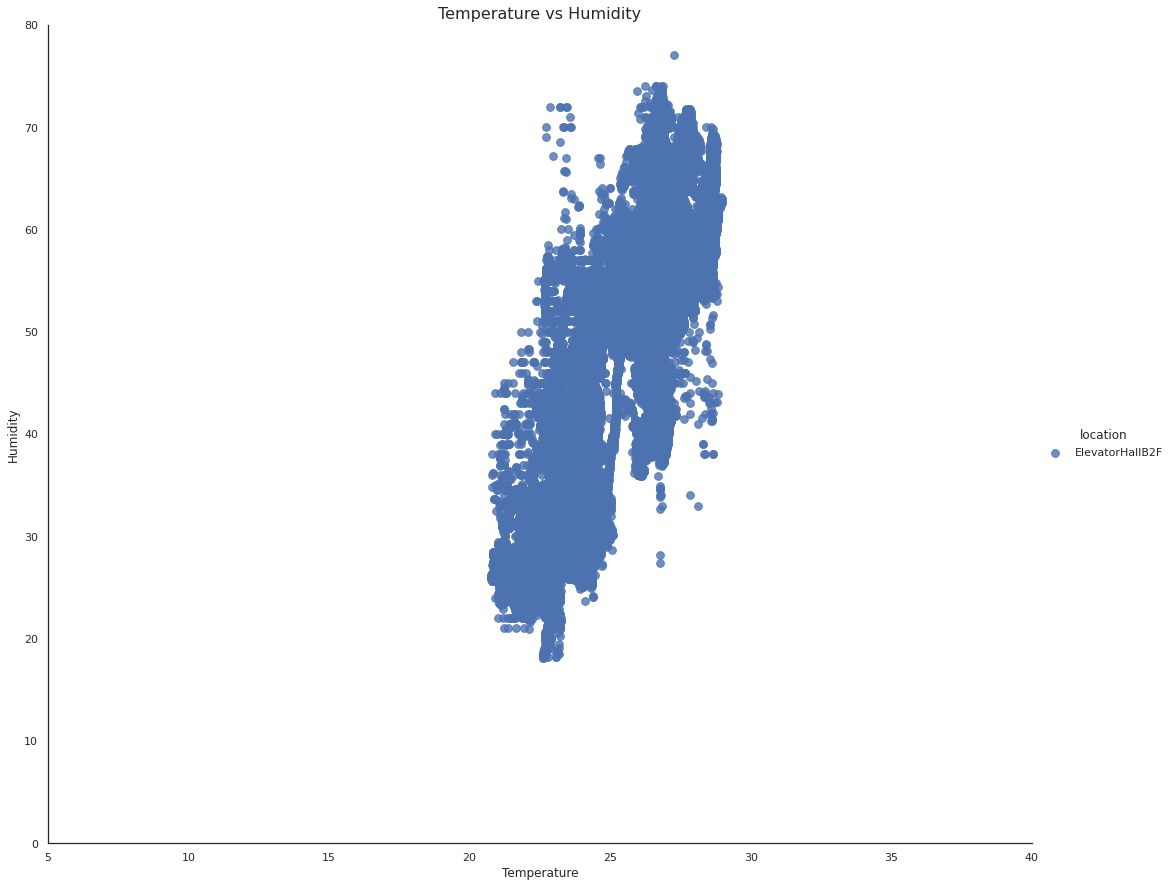

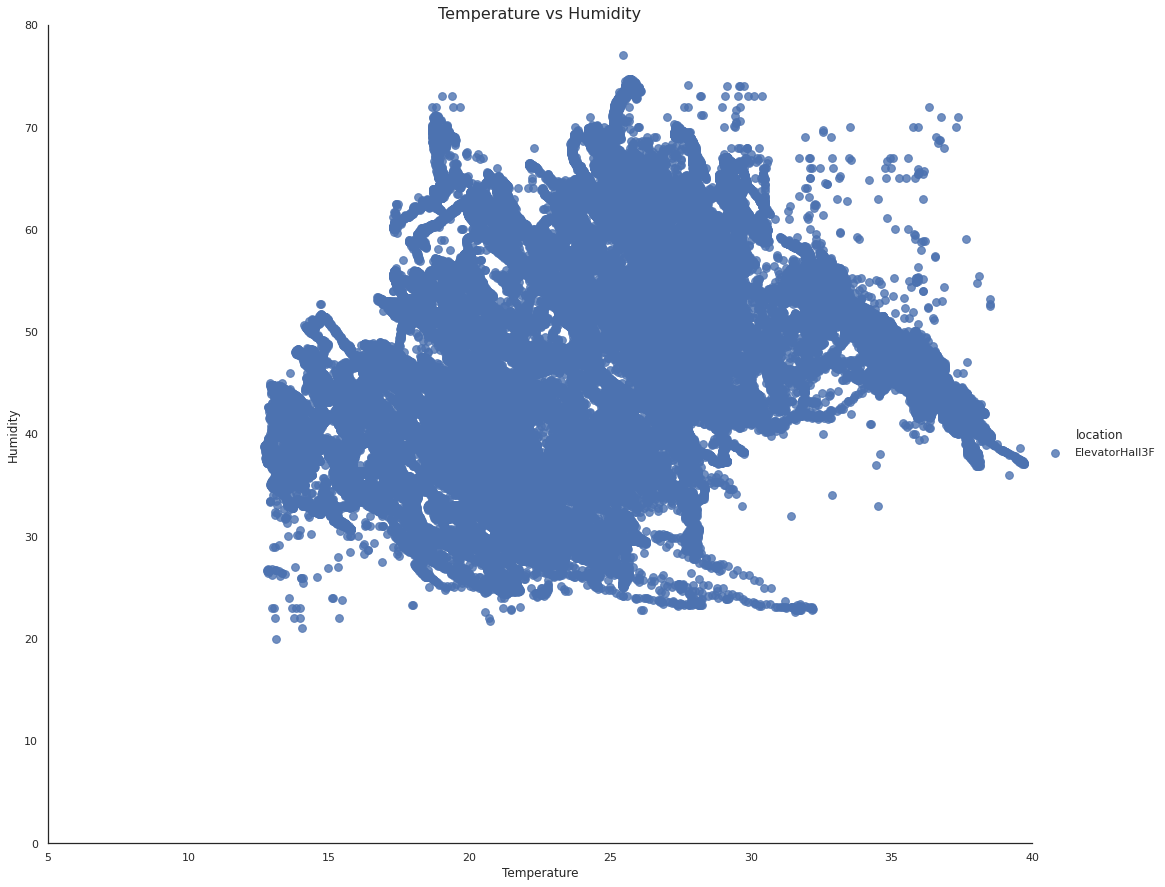

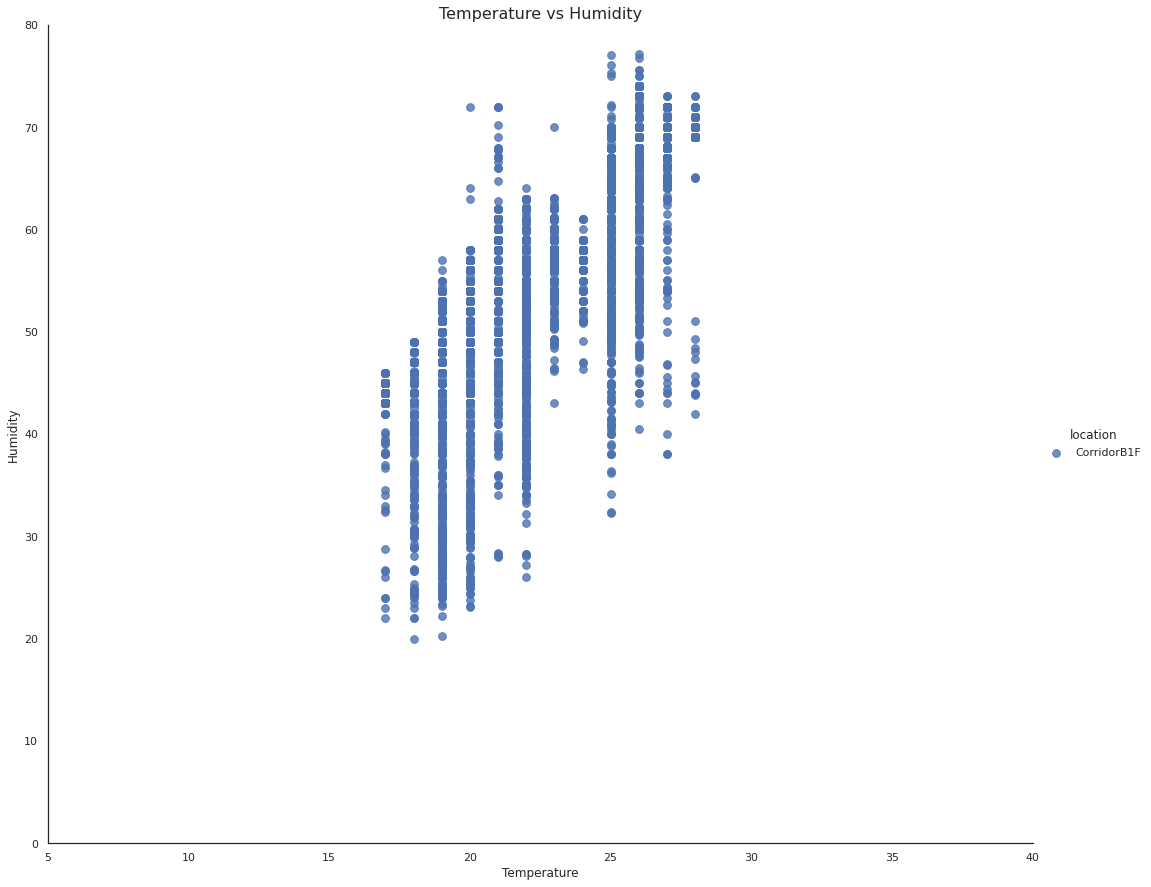

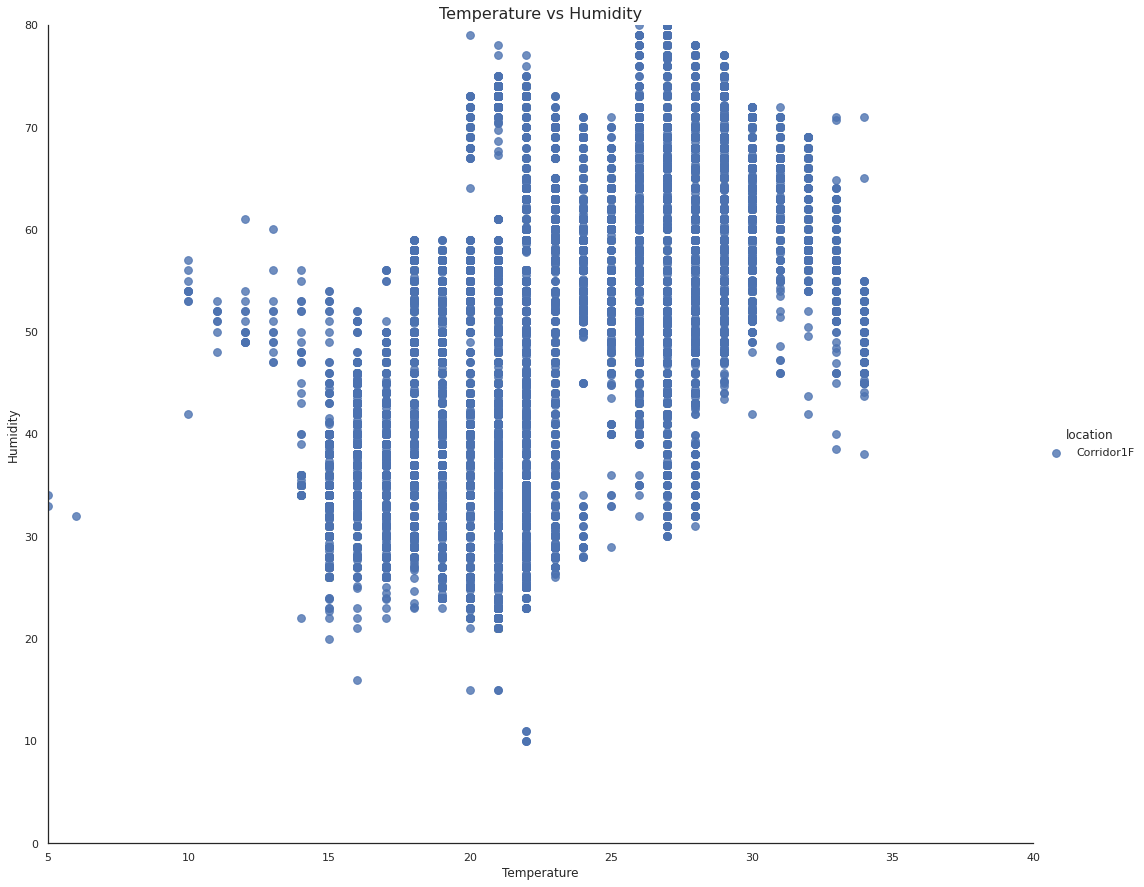

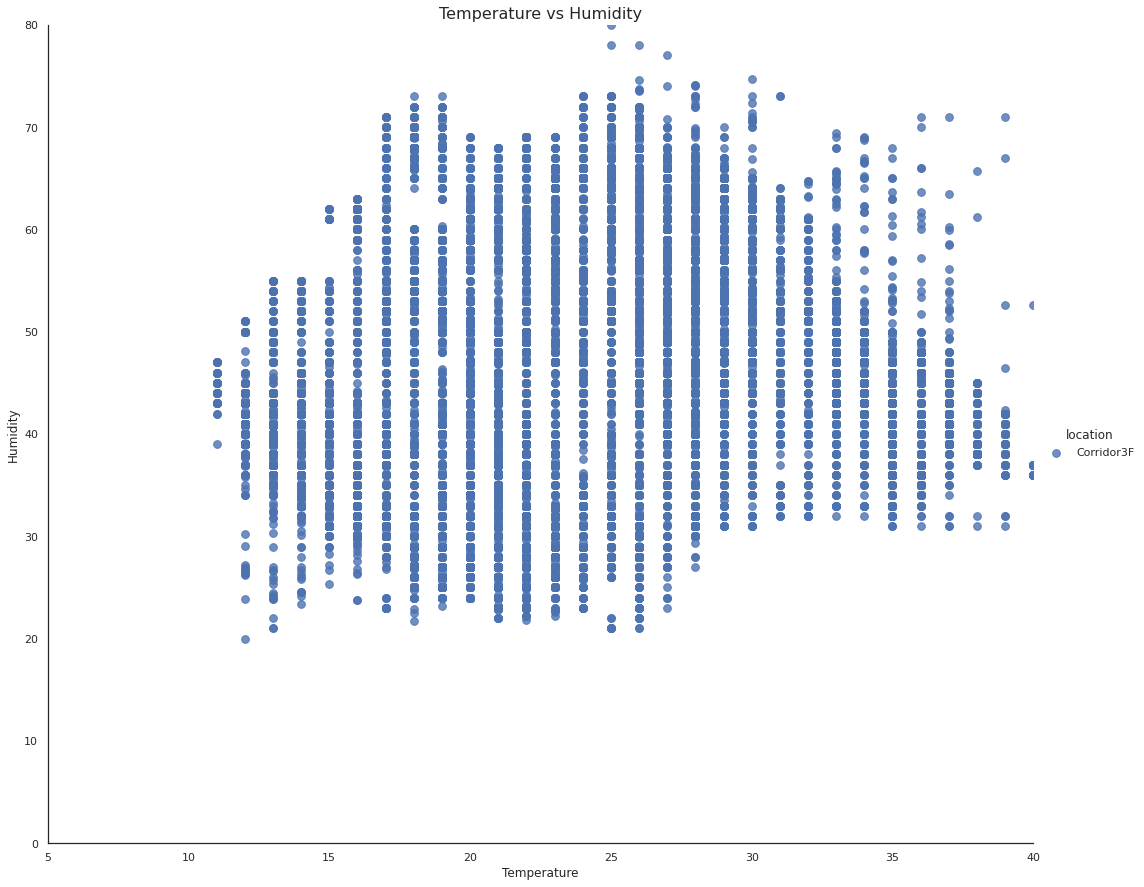

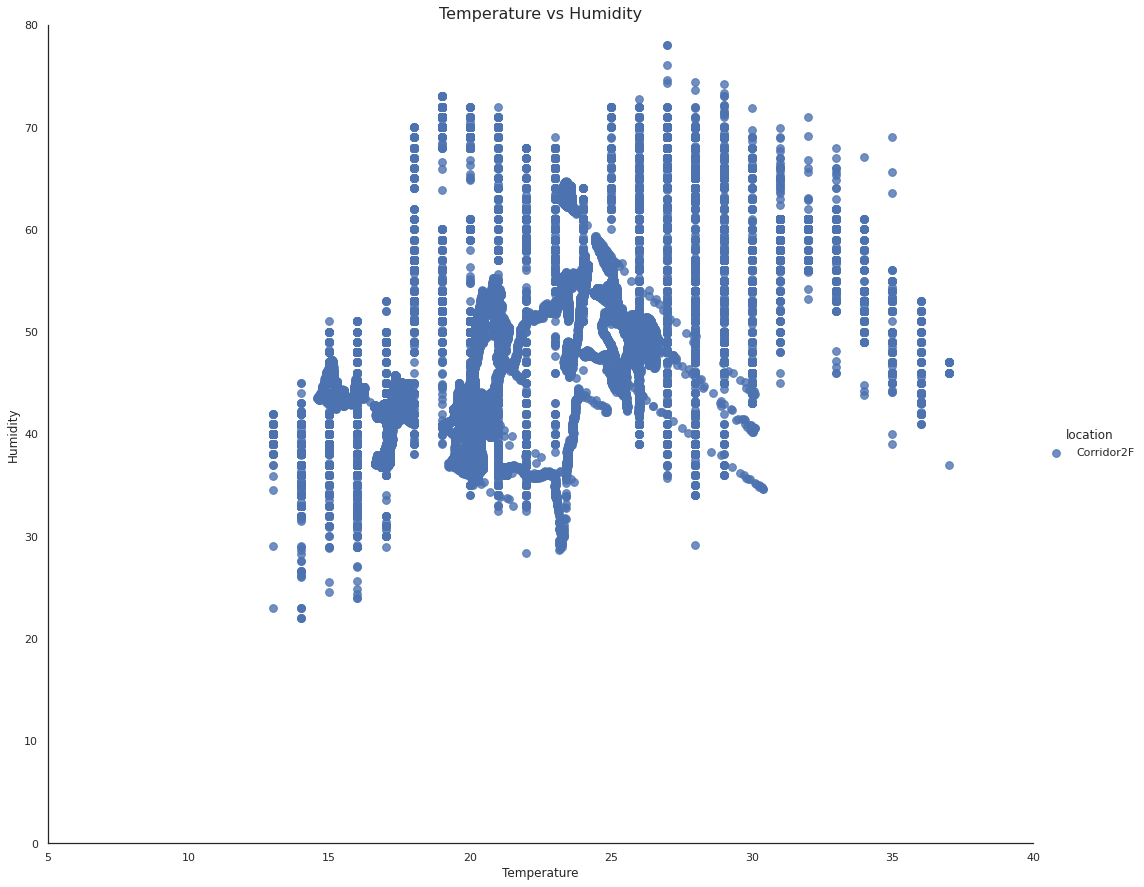

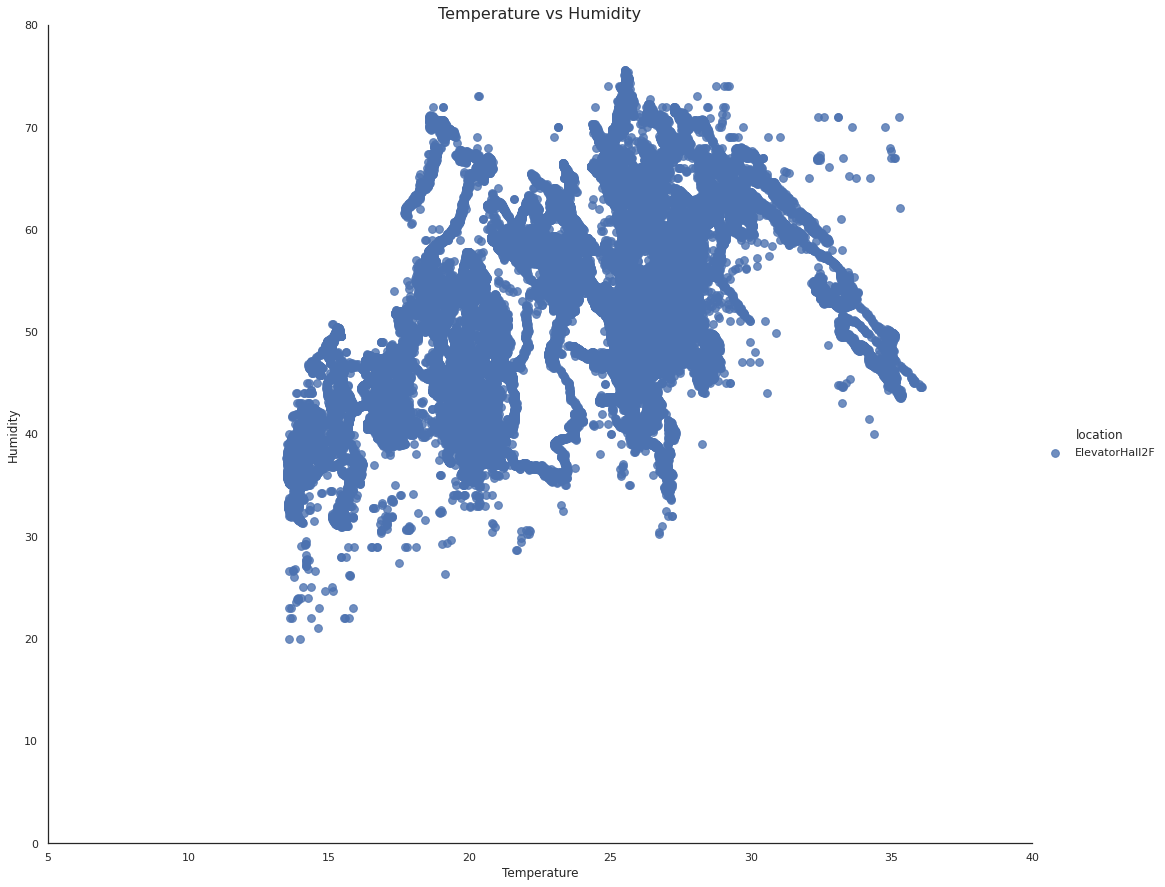

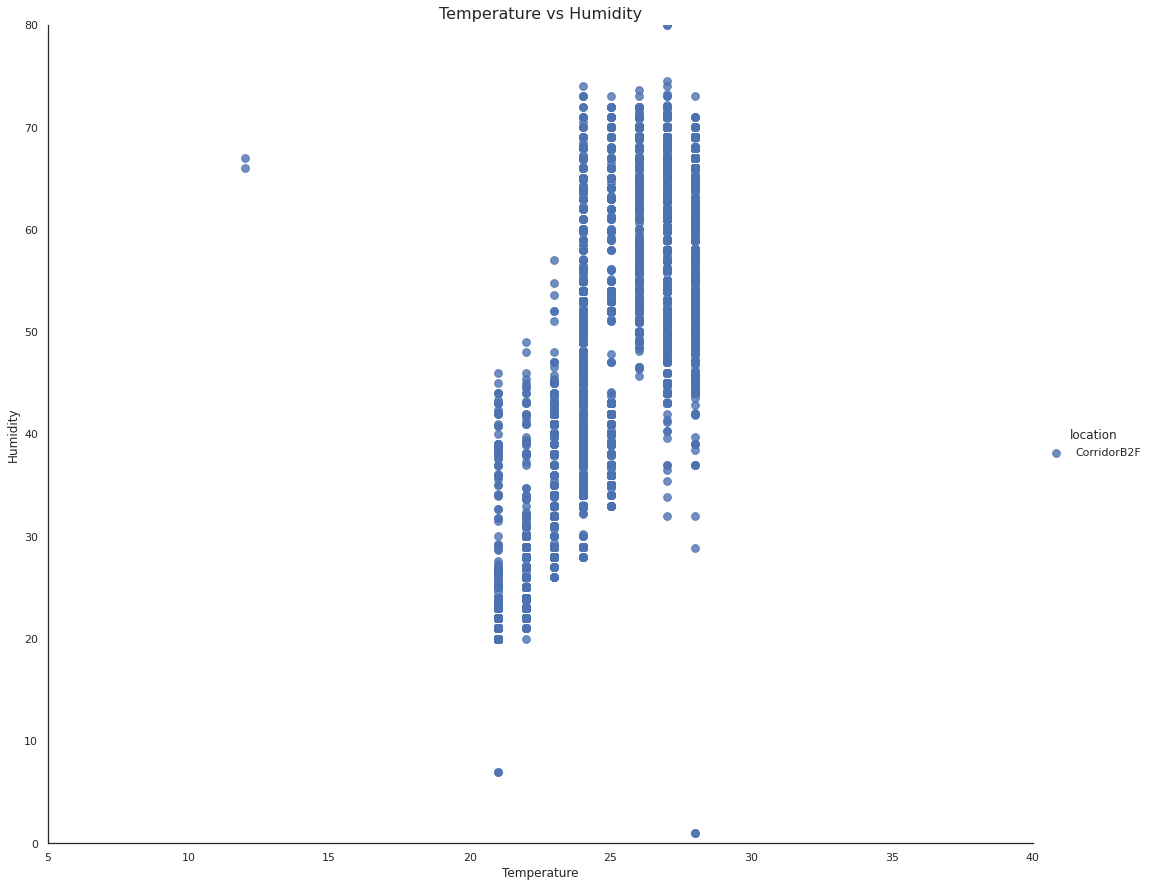

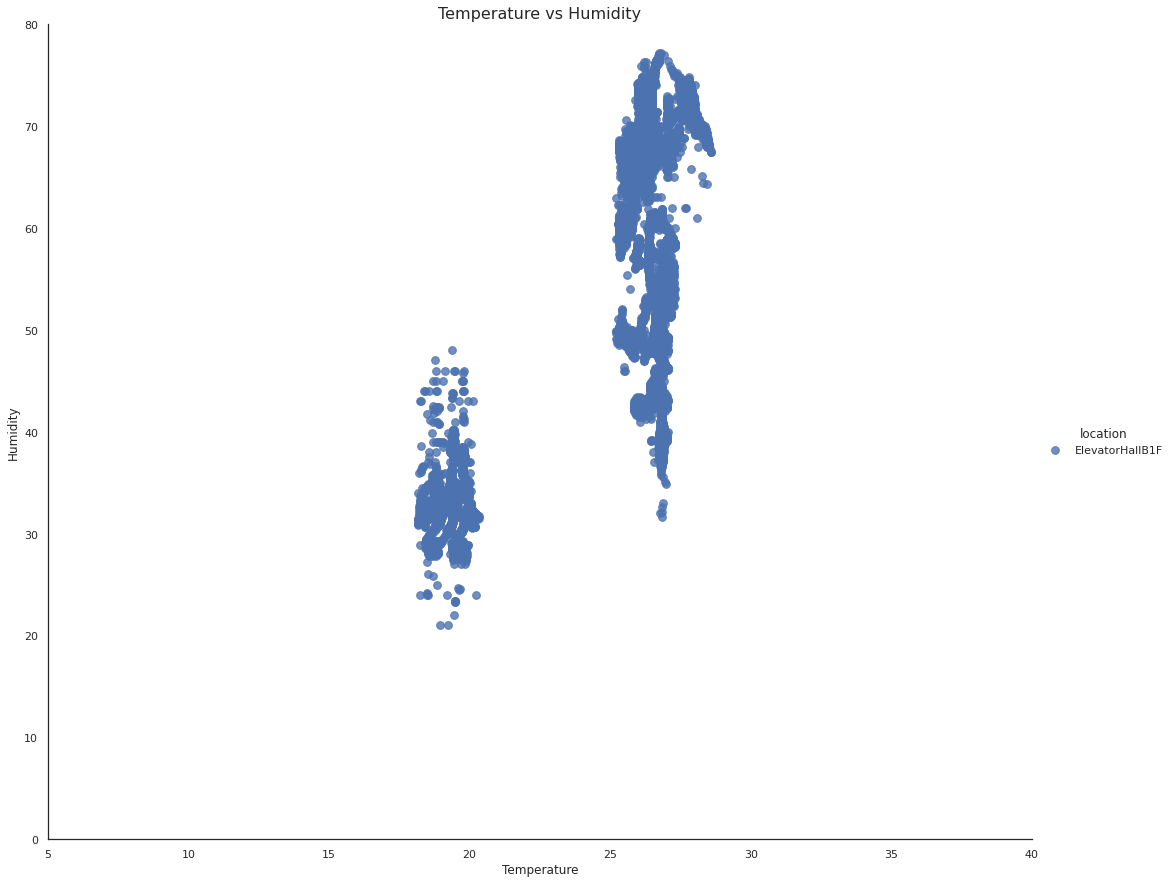

In [15]:
figsize(5, 4)

locations=features['location'].unique()
for each in locations:
    each_loca=features.loc[features["location"]==each]
    sns.lmplot('temperature', 'humidity', 
          hue = 'location', data = each_loca,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);
    plt.xlabel("Temperature", size = 12)
    plt.xlim(5,40)
    plt.ylim(0,80)
    plt.ylabel('Humidity', size = 12)
    plt.title('Temperature vs Humidity', size = 16);

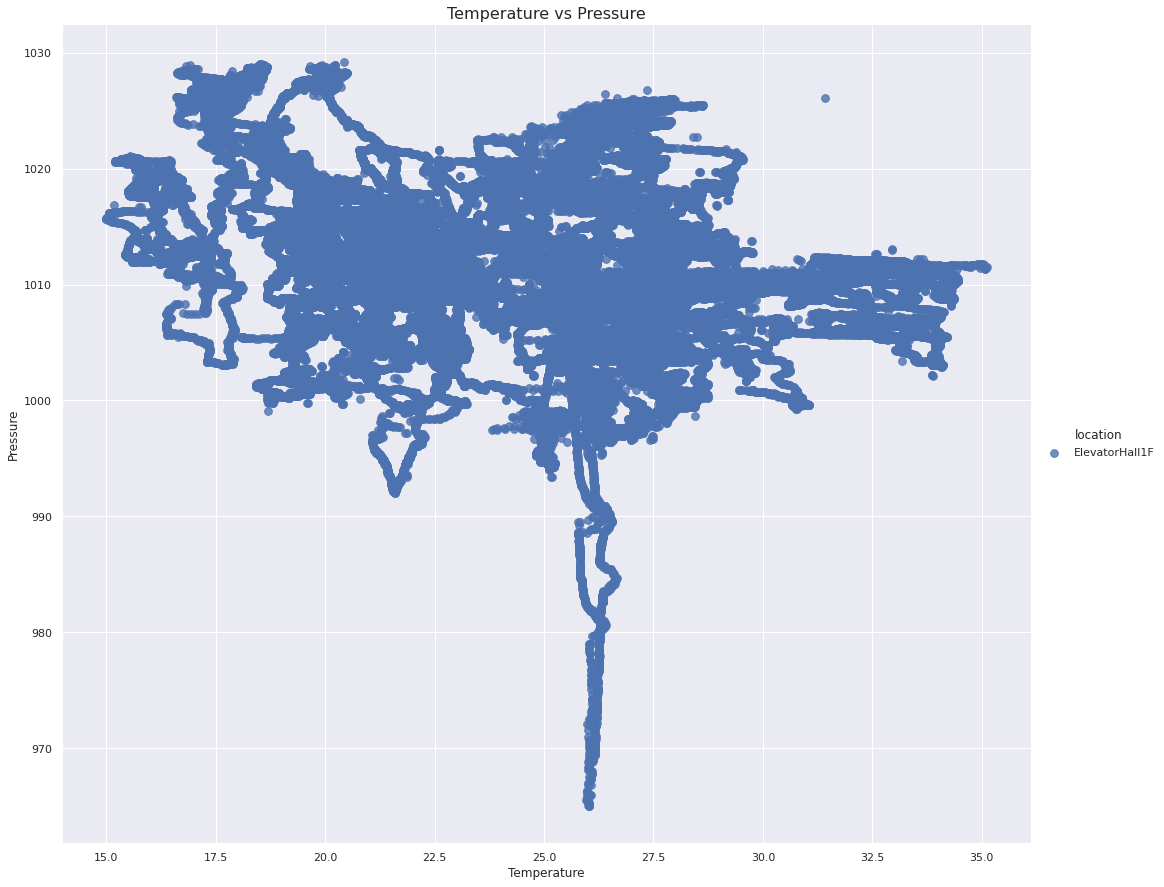

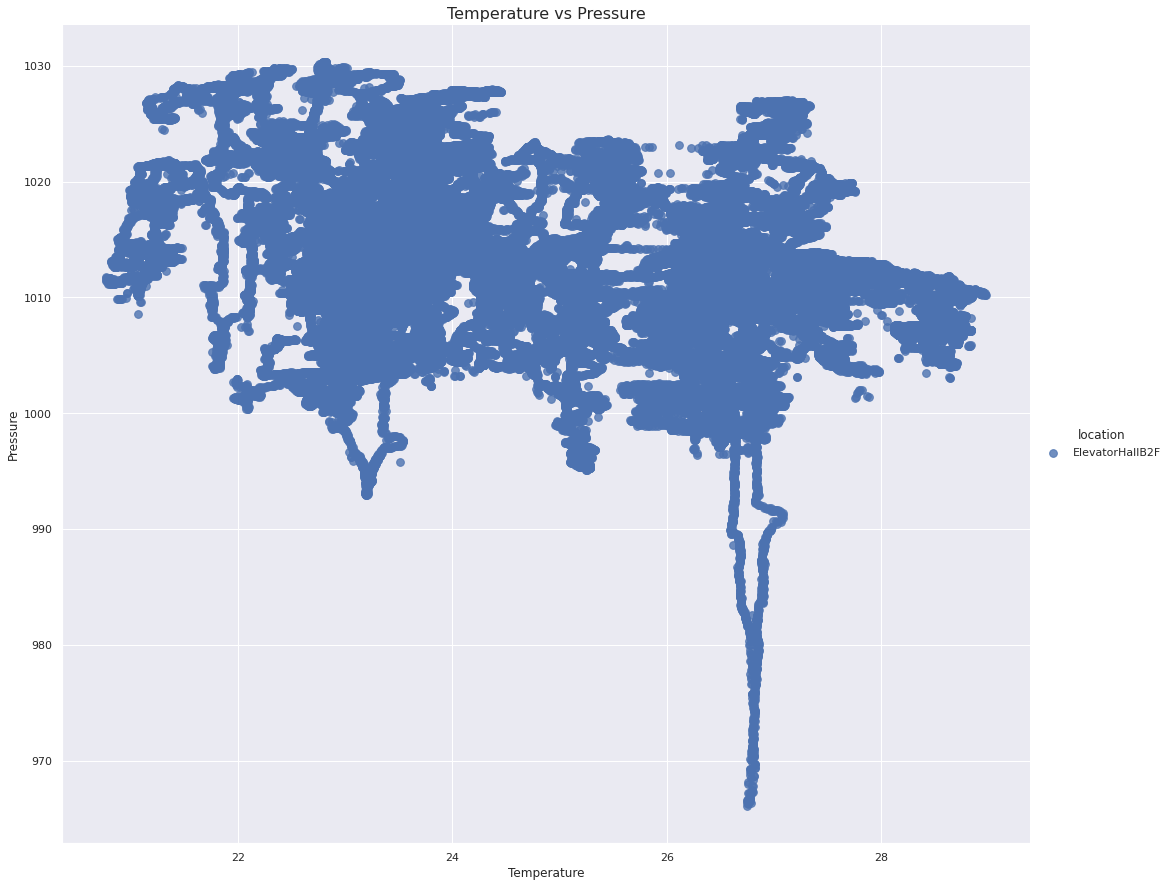

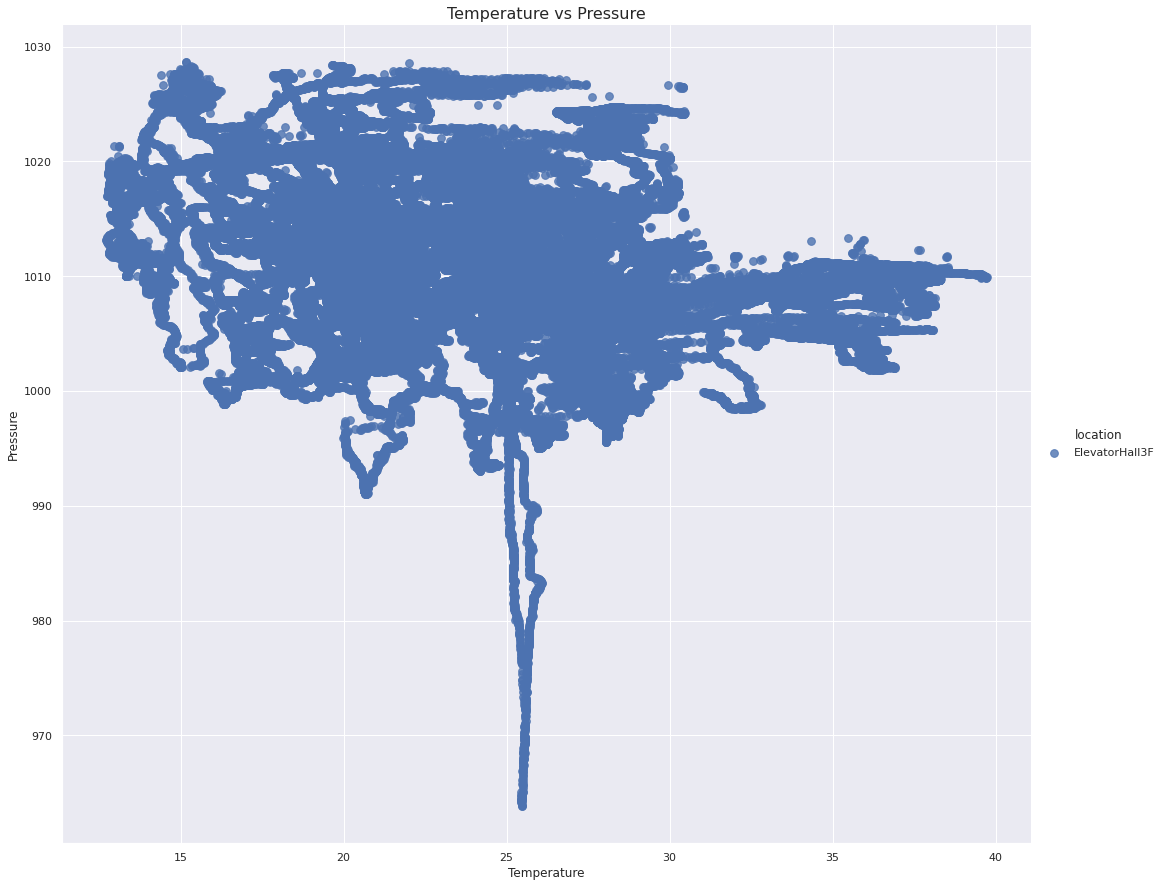

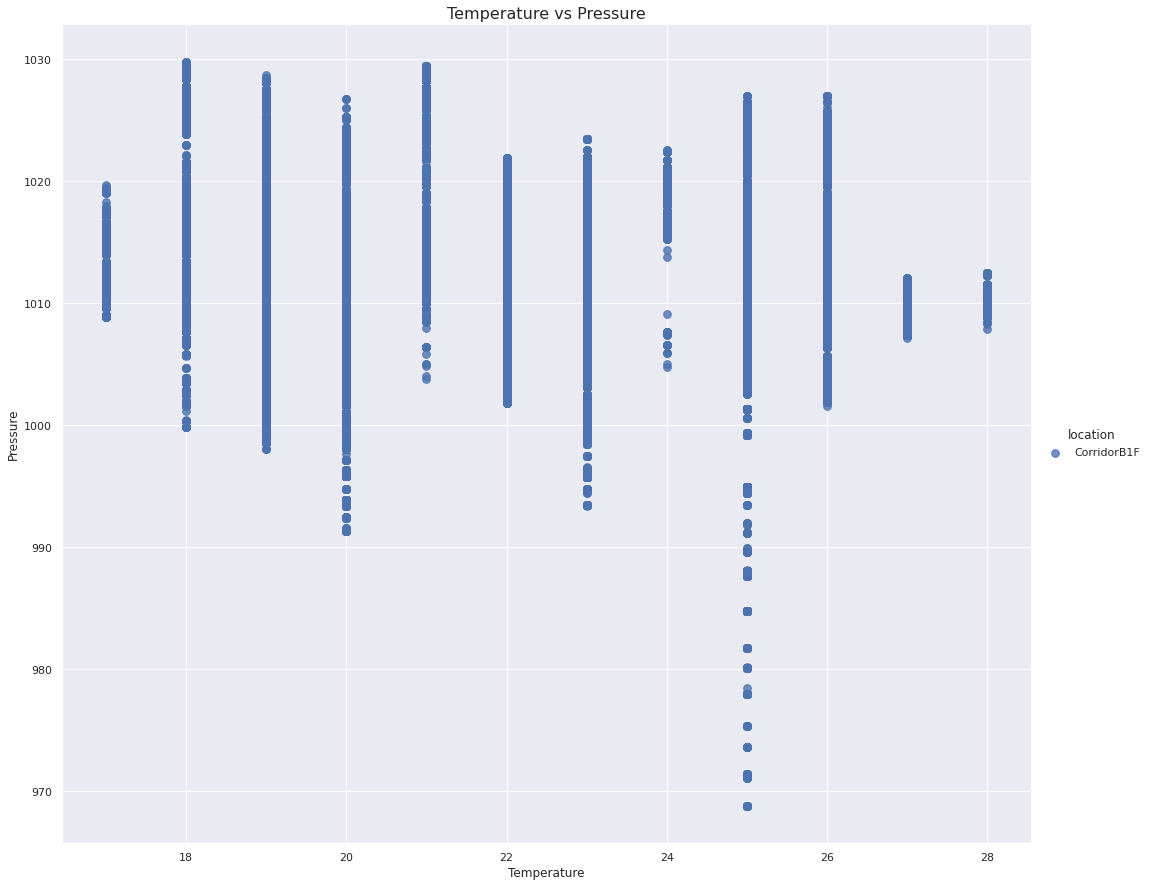

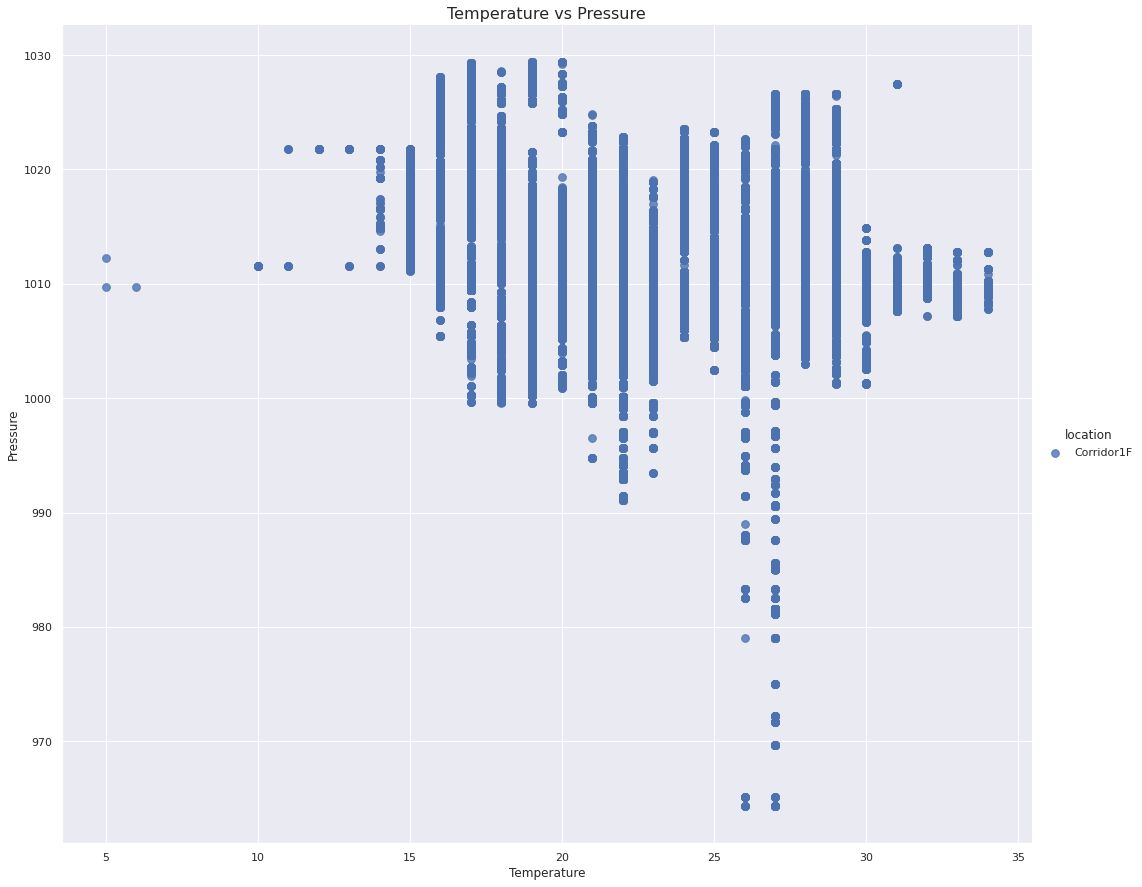

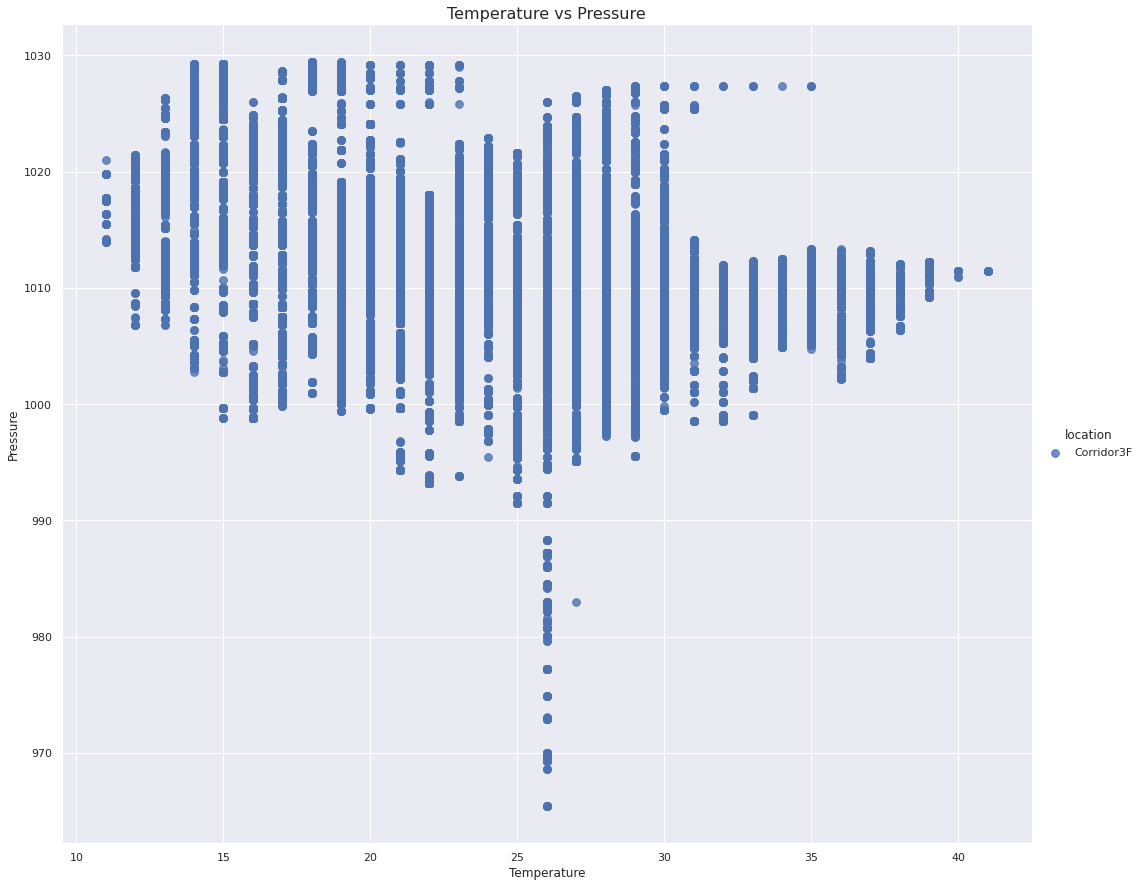

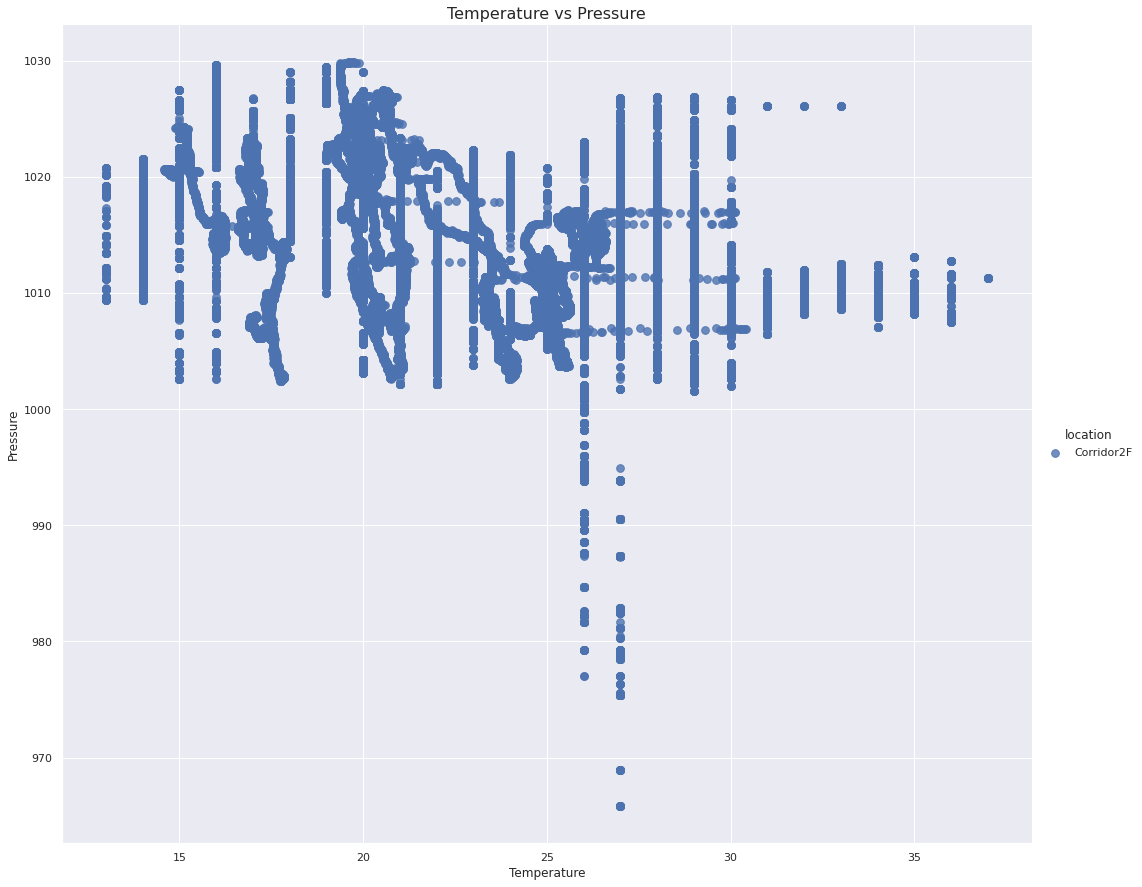

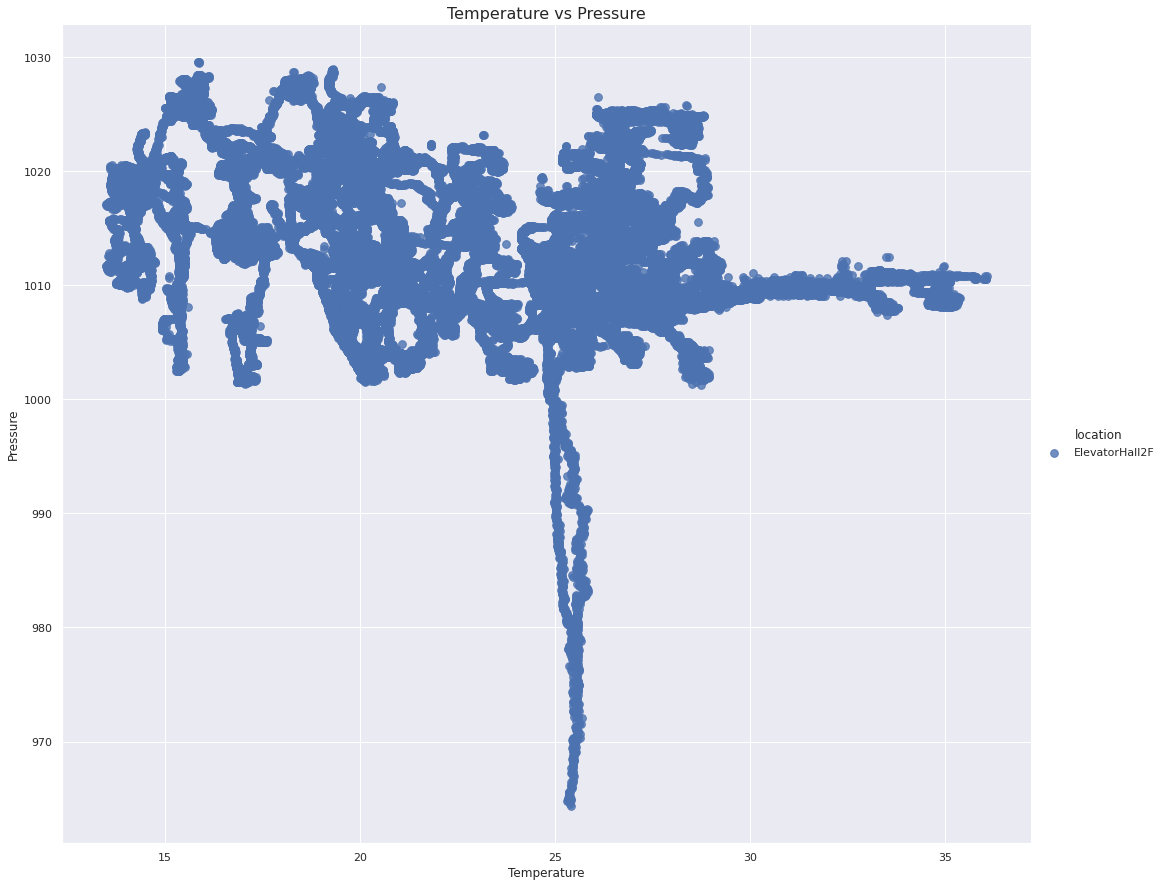

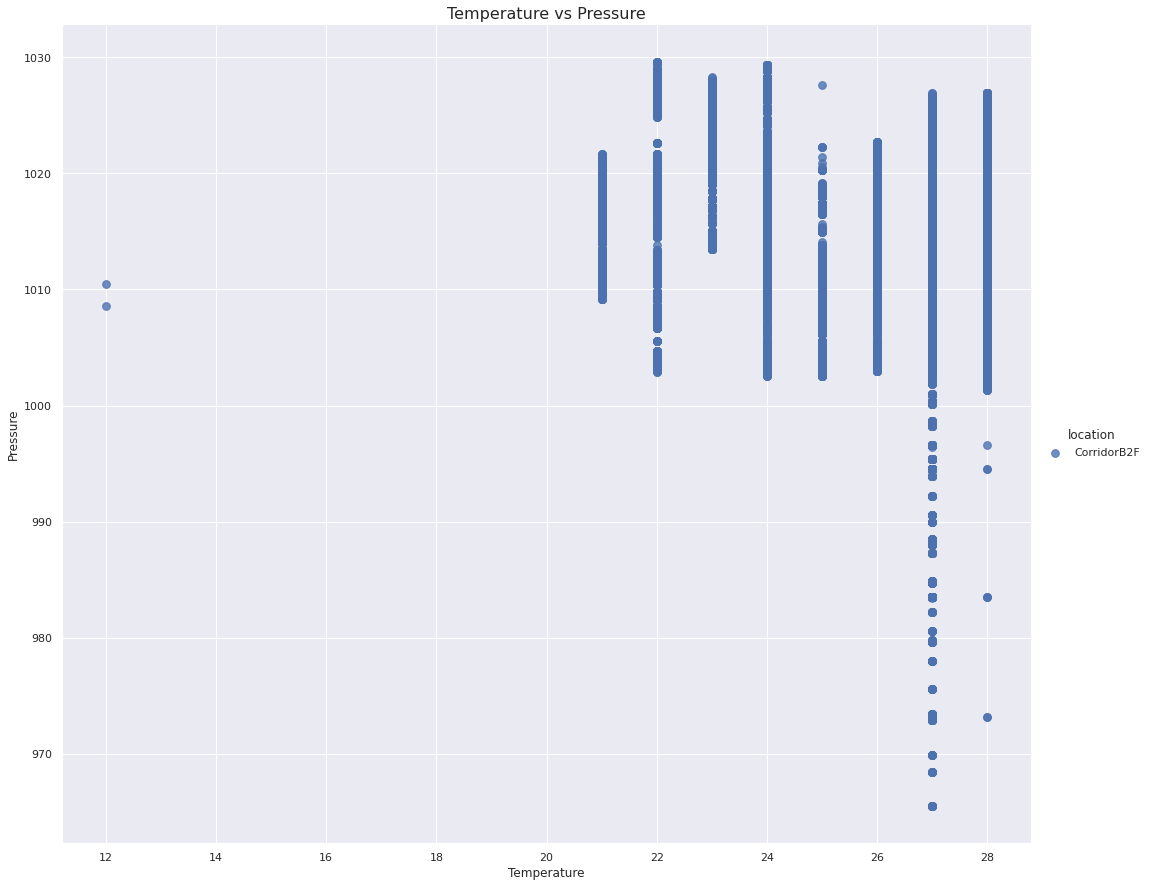

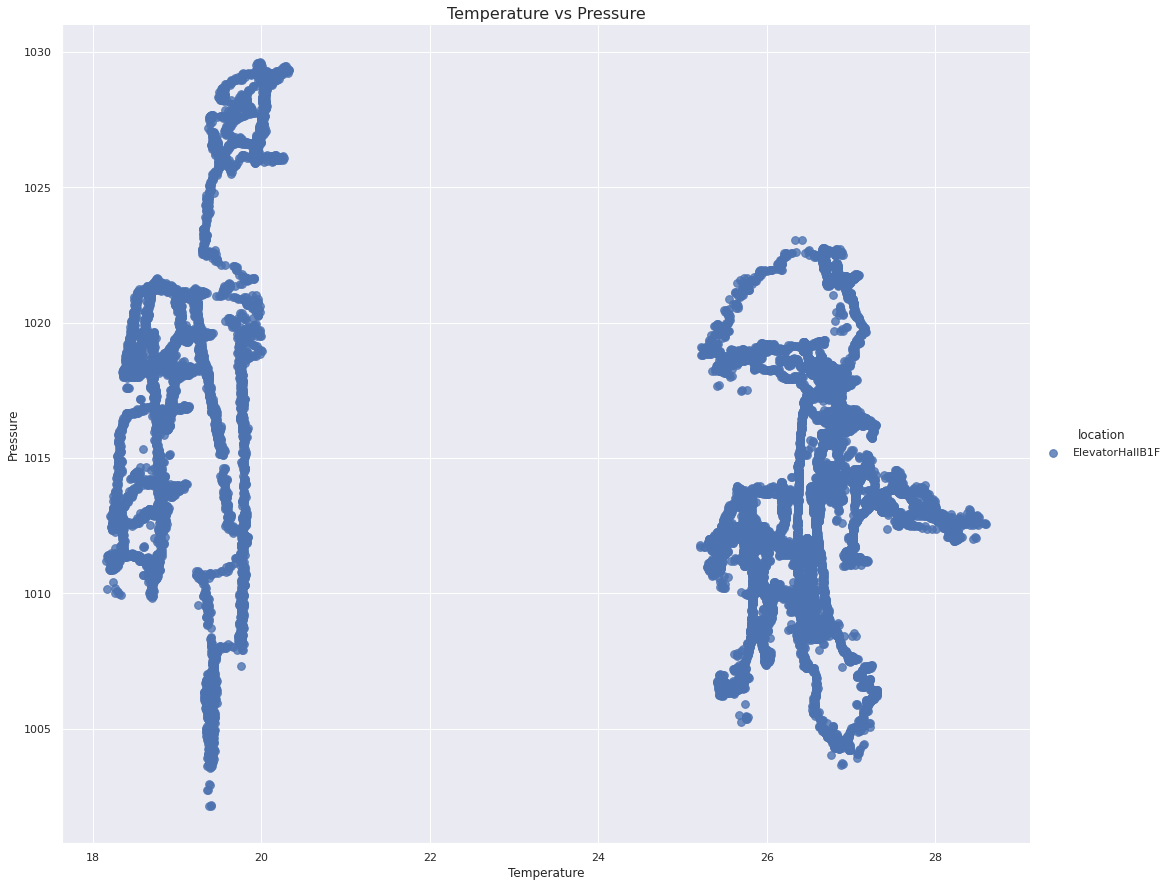

In [194]:
figsize(5, 4)
for each in locations:
    each_loca=features.loc[features["location"]==each]
    sns.lmplot('temperature', 'pressure', 
          hue = 'location', data = each_loca,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);
    #plt.xlim(5,40)
    #plt.ylim(0,80)
    plt.xlabel("Temperature", size = 12)
    plt.ylabel('Pressure', size = 12)
    plt.title('Temperature vs Pressure', size = 16);

### Pairs Plot

`PairGrid` customize

In [ ]:
# Extract the columns to  plot
plot_data = features[['temperature','humidity','light','pressure']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Environmental Sensing Data Plot', size = 36, y = 1.02)
plt.savefig('./images/pairplot.png',quality=100,dpi=500)

### 特征工程与特征筛选


通过EDA我们已经对数据有了一定了解，比如我们发现建筑物类型对得分的影响差别很大，经过一些数值变换(log之类的)对结果影响并不大，这些都是我们可以利用的信息，接下来就是最重要的特征工程环节。

一般情况下我们分两步走：特征工程与特征筛选：

- 特征工程：概括性来说就是尽可能的多在数据中提取特征，各种数值变换，特征组合，分解等各种手段齐上阵。


- 特征选择：就是找到最有价值的那些特征作为我们模型的输入，但是之前做了那么多，可能有些是多余的，有些还没被发现，所以这俩阶段都是一个反复在更新的过程。比如我在建模之后拿到了特征重要性，这就为特征选择做了参考，有些不重要的我可以去掉，那些比较重要的，我还可以再想办法让其做更多变换和组合来促进我的模型。所以特征工程并不是一次性就能解决的，需要通过各种结果来反复斟酌。


我们接下来要对数据做一些事情，选择数值特征和种类特征对他们进行log变换与One-hot encode。剔除掉共线特征，可以参考[multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)


In [ ]:
features.head(5)

In [ ]:
### 剔除共线特征
#在数据中`a` 和 `b`就是要考虑的目标，他俩描述的基本是同一个事，只是计算稍有不用，我们来看下
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    #y = x['score']
    #x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    print("remove ",drops)
    x = x.drop(columns = drops)
#     #x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
#                           'Water Use (All Water Sources) (kgal)',
#                           'log_Water Use (All Water Sources) (kgal)',
#                           'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    #x['score'] = y
               
    return x

In [45]:
# Remove the collinear features above a specified correlation coefficient
features.shape
features = all_file_data.copy()

#features = remove_collinear_features(features, 0.6);
features.shape

(1259193, 12)

In [46]:
features.head(5)

,location,temperature,new_tsp,humidity,light,pressure,weekday,quarter,month,hour,day,location_no
new_tsp,,,,,,,,,,,,
2020-05-03 00:00:06,ElevatorHall1F,26.768128,2020-05-03 00:00:06,46.338968,NaN,1012.104684,7,2,5,0,3,5
2020-05-03 00:00:18,ElevatorHallB2F,24.168304,2020-05-03 00:00:18,51.785765,NaN,1013.288941,7,2,5,0,3,1
2020-05-03 00:00:22,ElevatorHall3F,29.677198,2020-05-03 00:00:22,38.256116,NaN,1010.999658,7,2,5,0,3,9
2020-05-03 00:00:28,CorridorB1F,22.000000,2020-05-03 00:00:28,57.000000,2.432000,1011.605575,7,2,5,0,3,4
2020-05-03 00:00:34,Corridor1F,27.000000,2020-05-03 00:00:34,50.000000,218.609881,1012.090911,7,2,5,0,3,6


In [21]:
# Separate out the features and targets
targets = pd.DataFrame(features['location_no'])
features =features.drop(columns={'location','location_no'})


# Replace the inf and -inf with nan (required for later imputation)
#features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)


X.to_csv('DB/new_data/training_features.csv', index = False)
X_test.to_csv('DB/new_data/testing_features.csv', index = False)
y.to_csv('DB/new_data/training_labels.csv', index = False)
y_test.to_csv('DB/new_data/testing_labels.csv', index = False)

(52794, 10)
(22627, 10)
(52794, 1)
(22627, 1)


In [22]:
# Save the no scores, training, and testing data
#no_location.to_csv('DB/data_fill/no_location.csv', index = False)
# X.to_csv('DB/data_fill/training_features.csv', index = False)
# X_test.to_csv('DB/data_fill/testing_features.csv', index = False)
# y.to_csv('DB/data_fill/training_labels.csv', index = False)
# y_test.to_csv('DB/data_fill/testing_labels.csv', index = False)


In [29]:
# Separate out the features and targets
targets = pd.DataFrame(features['floor_no'])
features =features.drop(columns={'location','floor_no'})


# Replace the inf and -inf with nan (required for later imputation)
#features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)


X.to_csv('DB/floor_data/training_features.csv', index = False)
X_test.to_csv('DB/floor_data/testing_features.csv', index = False)
y.to_csv('DB/floor_data/training_labels.csv', index = False)
y_test.to_csv('DB/floor_data/testing_labels.csv', index = False)

(881435, 10)
(377758, 10)
(881435, 1)
(377758, 1)


In [ ]:
#这部分先不实行

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

stdsc = StandardScaler()


ss= MinMaxScaler()
scale_features = ['pressure', 'light','temperature']#标准化0-1
#hr[scale_features] = ss.fit_transform(hr[scale_features])

features[scale_features] = stdsc.fit_transform(features[scale_features])
features[scale_features] = stdsc.fit_transform(features[scale_features])#标准化

features.head(5)

In [ ]:
# Extract the buildings with no score and the buildings with a score
no_location = features[features['location'].isna()]
location = features[features['location'].notnull()]

print(no_location.shape)
print(location.shape)

### 建立一个Baseline 

### 衡量标准: Mean Absolute Error



In [ ]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

### 结果保存下来，建模再用